<a href="https://colab.research.google.com/github/ywanglab/Predicting_stock_movement/blob/main/Time_series_stock_data_analysis_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
## Section 1: Extracting Stock Data using yfiance
## Section 2: 

## Section 1: Extracting Stock Data Using a Python Library



In [1]:
!pip install yfinance
#!pip install pandas

     |████████████████████████████████| 6.4 MB 32.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import sys,os
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display

#os.chdir("/content")
#from colorsetup import colors, palette
#sns.set_palette(palette)

# ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plotsize = (13, 5)
plt.rcParams['figure.figsize'] = plotsize


## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary. We can get the 'country' using the key country, and 'sector' using the key sector.


In [ ]:
apple.info['country'], apple.info['sector']

('United States', 'Technology')

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [4]:
apple_share_price_data = apple.history(period="max")

In [ ]:
#apple_share_price_data.to_csv('apple_df.csv')

In [ ]:
#df =pd.read_csv('apple_df.csv')

In [ ]:
#df.set_index(df.Date,drop=True, inplace=True)

In [ ]:
#df.drop(['Date'],axis=1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.00,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.00,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.00,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.00,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.00,0.0
...,...,...,...,...,...,...,...
2022-01-31,169.943485,174.777323,169.294303,174.557602,115541600,0.00,0.0
2022-02-01,173.788575,174.617520,172.090741,174.387817,85908800,0.00,0.0
2022-02-02,174.527647,175.656214,173.109456,175.616257,84914300,0.00,0.0


In [ ]:
apple_share_price_data=df

In [ ]:
display(apple_share_price_data.head()), display(apple_share_price_data.tail())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-01-31,2022-01-31,169.943485,174.777323,169.294303,174.557602,115541600,0.00,0.0
2022-02-01,2022-02-01,173.788575,174.617520,172.090741,174.387817,85908800,0.00,0.0
2022-02-02,2022-02-02,174.527647,175.656214,173.109456,175.616257,84914300,0.00,0.0
2022-02-03,2022-02-03,174.257984,176.015754,171.900986,172.679993,89418100,0.00,0.0
2022-02-04,2022-02-04,171.679993,174.100006,170.679993,172.389999,82391400,0.22,0.0


(None, None)

In [ ]:
apple_share_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10376 entries, 1980-12-12 to 2022-02-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10376 non-null  float64
 1   High          10376 non-null  float64
 2   Low           10376 non-null  float64
 3   Close         10376 non-null  float64
 4   Volume        10376 non-null  int64  
 5   Dividends     10376 non-null  float64
 6   Stock Splits  10376 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 648.5 KB


In [ ]:
apple_share_price_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10376.000000,10376.000000,10376.000000,10376.000000,1.037600e+04,10376.000000,10376.000000
mean,12.861594,13.000304,12.723888,12.867401,3.329451e+08,0.000592,0.001638
std,28.684588,29.007708,28.370088,28.702418,3.395989e+08,0.009901,0.086134
min,0.038822,0.038822,0.038385,0.038385,0.000000e+00,0.000000,0.000000
25%,0.234179,0.239232,0.228377,0.233906,1.254708e+08,0.000000,0.000000
50%,0.383453,0.390048,0.377143,0.383855,2.210900e+08,0.000000,0.000000
75%,11.960087,12.071479,11.846628,11.942044,4.142341e+08,0.000000,0.000000
max,182.397624,182.707227,178.892080,181.778397,7.421641e+09,0.220000,7.000000


## Section 2: Exploratory Data Analysis


In this section, we define the function make_graph.  It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [ ]:
def make_graph(stock_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=False, \
                        subplot_titles=(stock_name+" Historical Share Price", stock_name+" Historical Volume"), \
                        vertical_spacing = .1)
    stock_data_specific = stock_data[stock_data.index <= '2023-01-22']
   
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.index, infer_datetime_format=True), \
                             y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.index, infer_datetime_format=True),\
                             y=stock_data_specific.Volume.astype("float"), name="Volume"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Volume (#Shares)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    #title=stock_name,
   # xaxis_rangeslider_visible=True 
    )
    fig.show()

In [ ]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [ ]:
make_graph(apple_share_price_data,"APPLE")

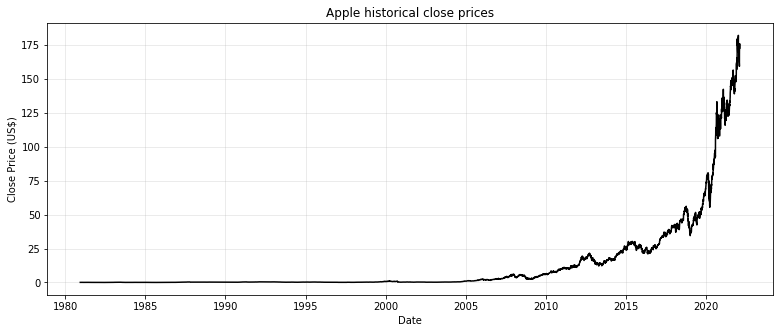

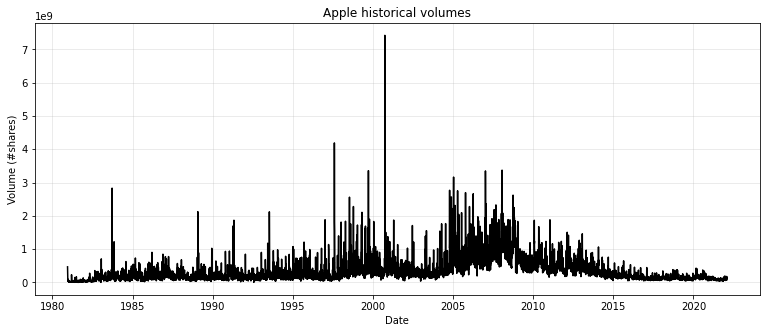

In [ ]:
run_sequence_plot(x=apple_share_price_data.index, y=apple_share_price_data['Close'],title="Apple historical close prices",
                  xlabel='Date', ylabel='Close Price (US$)')
plt.show()
run_sequence_plot(x=apple_share_price_data.index, y=apple_share_price_data['Volume'],title="Apple historical volumes",
                  xlabel='Date', ylabel='Volume (#shares)')

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [ ]:
apple_share_price_data[apple_share_price_data['Dividends']!=0].shape

(74, 7)

We can plot the dividends overtime:



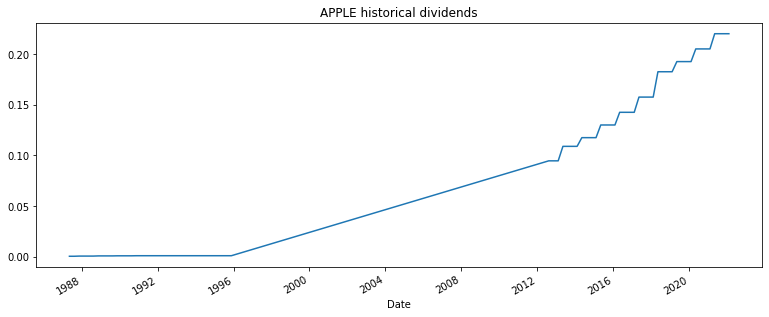

In [ ]:
plt.figure(figsize=plotsize)
apple.dividends.plot(title="APPLE historical dividends")


### Resampling

In [ ]:
apple_weekly = apple_share_price_data.resample('W').mean()
print('Weekly Prices')
print(apple_weekly.head(), '\n')

apple_monthly = apple_share_price_data.resample('M').mean()
print('Monthly Prices')
print(apple_monthly.head(), '\n')

apple_quarterly = apple_share_price_data.resample('Q').mean()
print('Quarterly Prices')
print(apple_quarterly.head(), '\n')

apple_annually = apple_share_price_data.resample('Y').mean()
print('Annually Prices')
print(apple_annually.head(), '\n')


Weekly Prices
                Open      High       Low  ...       Volume  Dividends  Stock Splits
Date                                      ...                                      
1980-12-14  0.100326  0.100762  0.100326  ...  469033600.0        0.0           0.0
1980-12-21  0.093172  0.093434  0.092998  ...   98026880.0        0.0           0.0
1980-12-28  0.112103  0.112539  0.112103  ...   46972800.0        0.0           0.0
1981-01-04  0.122136  0.122463  0.121918  ...   54863200.0        0.0           0.0
1981-01-11  0.111318  0.111405  0.110969  ...   39580800.0        0.0           0.0

[5 rows x 7 columns] 

Monthly Prices
                Open      High       Low  ...        Volume  Dividends  Stock Splits
Date                                      ...                                       
1980-12-31  0.106365  0.106667  0.106231  ...  1.034501e+08        0.0           0.0
1981-01-31  0.110815  0.111065  0.110462  ...  2.899947e+07        0.0           0.0
1981-02-28  0.09240

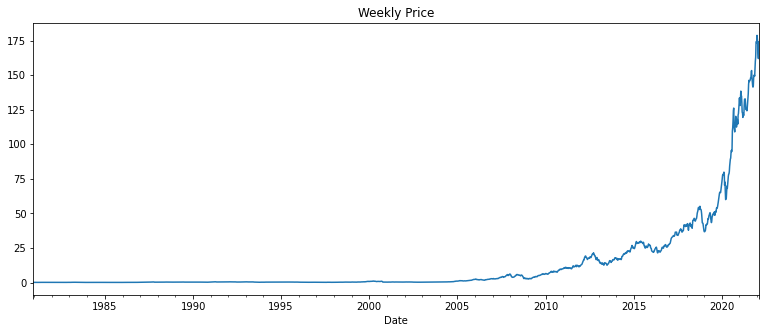

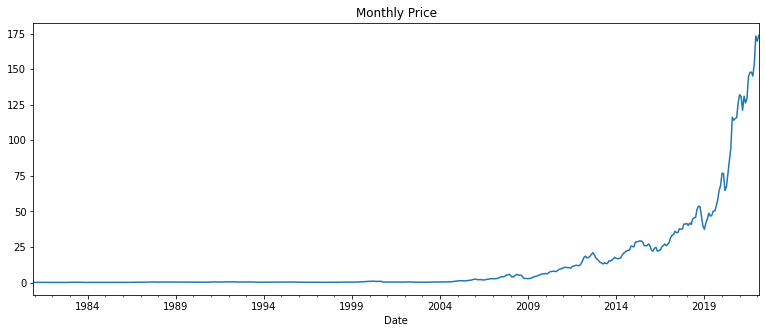

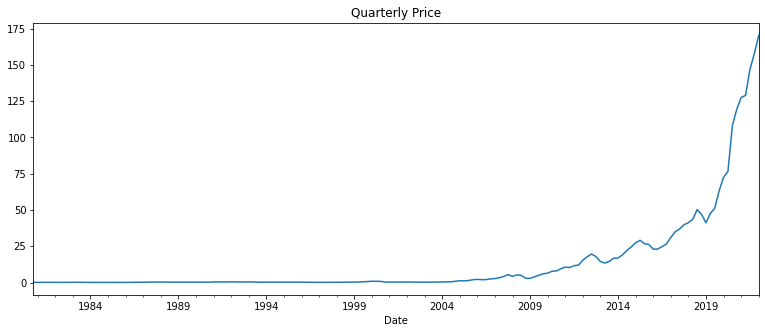

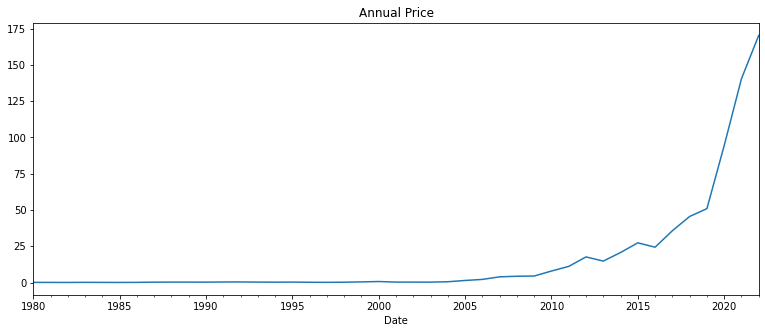

In [ ]:
apple_weekly['Close'].plot(figsize=plotsize, title='Weekly Price')
plt.figure()
#plt.title('Monthly Sales')
apple_monthly['Close'].plot(figsize=plotsize, title='Monthly Price')
plt.figure()
apple_quarterly['Close'].plot(figsize=plotsize, title='Quarterly Price')

plt.figure()
apple_annually['Close'].plot(figsize=plotsize, title='Annual Price')


### Examine seasonality

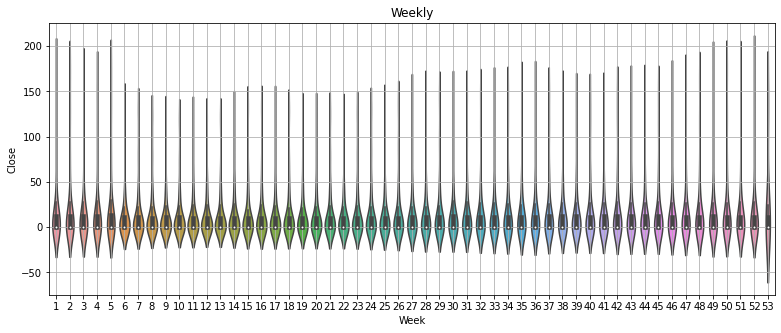

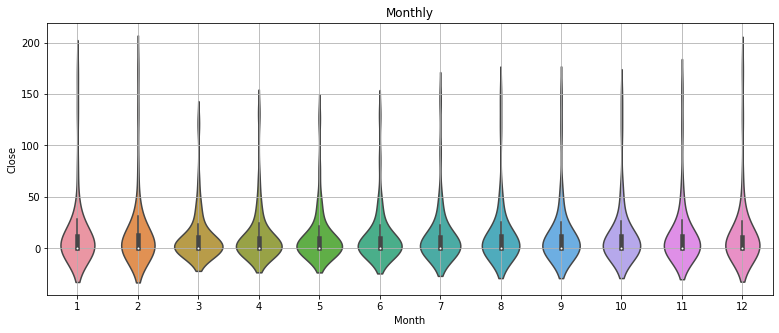

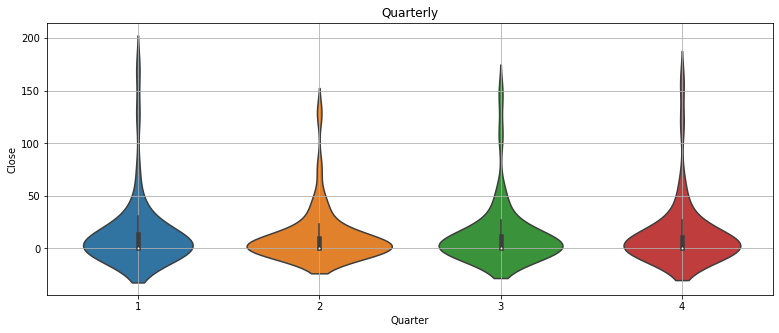

In [ ]:
# violinplot of months to determine variance and range
ax=sns.violinplot(x=apple_weekly.index.week, y=apple_weekly.Close)
plt.grid(b=True);
ax.set_title('Weekly')
ax.set_xlabel('Week')
plt.show()

ax1=sns.violinplot(x=apple_monthly.index.month, y=apple_monthly.Close)
ax1.set_title('Monthly')
ax1.set_xlabel("Month")
plt.grid(b=True);
plt.show()

ax2=sns.violinplot(x=apple_quarterly.index.quarter, y=apple_quarterly.Close)
ax2.set_title('Quarterly')
ax2.set_xlabel("Quarter")
plt.grid(b=True);
plt.show()


Monthly Data Seasonal Plot


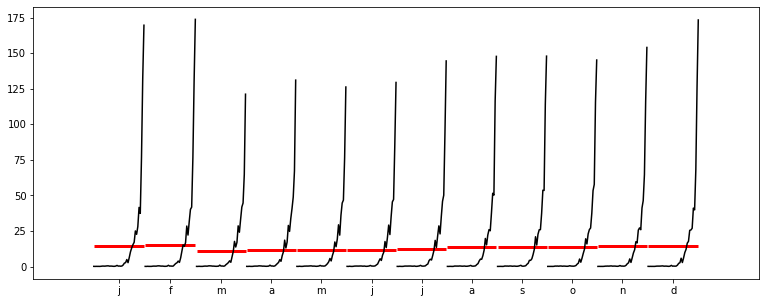

In [ ]:
from statsmodels.graphics.tsaplots import  month_plot, quarter_plot
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(apple_monthly['Close'])


Quarterly Data Seasonal Plot


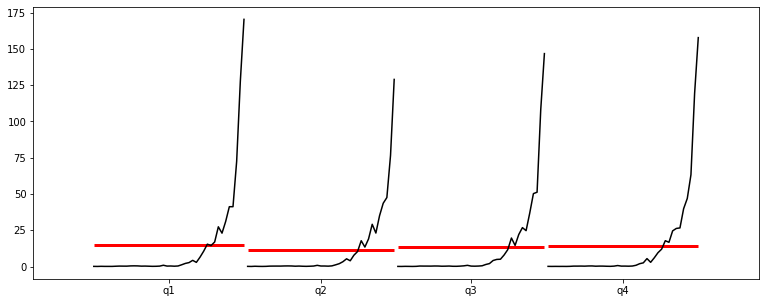

In [ ]:
print('\nQuarterly Data Seasonal Plot')
q_plot = quarter_plot(apple_quarterly['Close'])

### Rolling Averages and Windows
Another approach to transforming data involves looking at rolling averages.  Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

In [ ]:
window_size = 5  # setup weekly rolling window
rolling_window = apple_share_price_data.rolling(window_size)
print('Rolling Mean')
print(rolling_window.mean().head())
print(rolling_window.mean().dropna().head())

print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())

print('\nCumulative Sum')
print(apple_share_price_data.cumsum().dropna().head())

Rolling Mean
                Open      High       Low  ...       Volume  Dividends  Stock Splits
Date                                      ...                                      
1980-12-12       NaN       NaN       NaN  ...          NaN        NaN           NaN
1980-12-15       NaN       NaN       NaN  ...          NaN        NaN           NaN
1980-12-16       NaN       NaN       NaN  ...          NaN        NaN           NaN
1980-12-17       NaN       NaN       NaN  ...          NaN        NaN           NaN
1980-12-18  0.093521  0.093783  0.093347  ...  182107520.0        0.0           0.0

[5 rows x 7 columns]
                Open      High       Low  ...       Volume  Dividends  Stock Splits
Date                                      ...                                      
1980-12-18  0.093521  0.093783  0.093347  ...  182107520.0        0.0           0.0
1980-12-19  0.093172  0.093434  0.092998  ...   98026880.0        0.0           0.0
1980-12-22  0.094742  0.095091  0.094655 

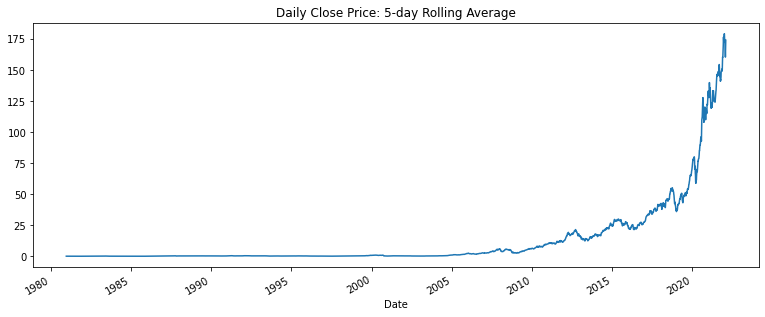

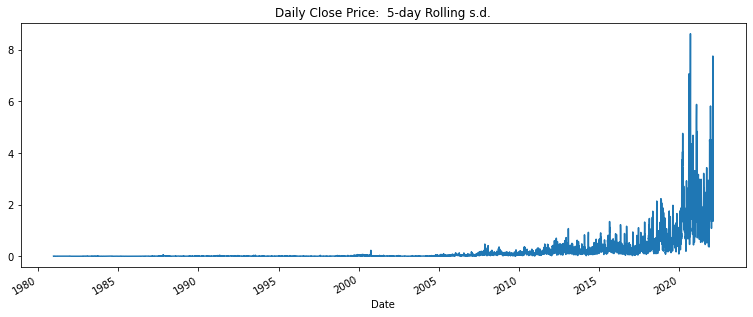

In [ ]:
rolling_window['Close'].mean().plot(figsize=plotsize, title='Daily Close Price: 5-day Rolling Average')
plt.show()
plt.figure()
rolling_window['Close'].std().plot(figsize=plotsize, title='Daily Close Price:  5-day Rolling s.d.')
plt.show()


### Examine autocorrelation

Daily data Autocorrelation Plots


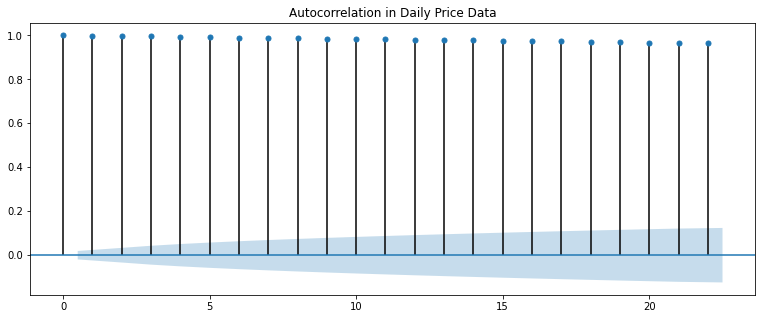

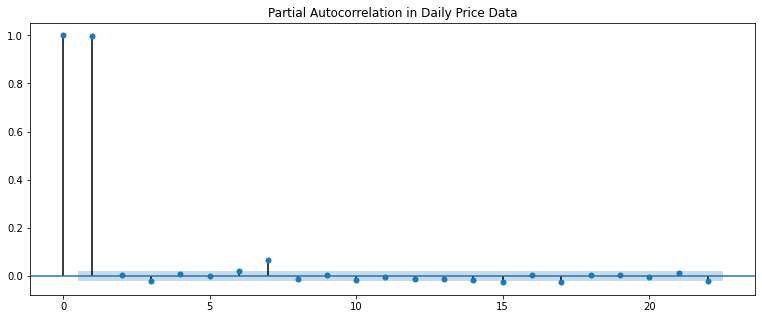

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print('Daily data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data

acf_plot = plot_acf(apple_share_price_data['Close'], lags=22, title='Autocorrelation in Daily Price Data')

pacf_plot = plot_pacf(apple_share_price_data['Close'], lags=22, title='Partial Autocorrelation in Daily Price Data')



Weekly data Autocorrelation Plots


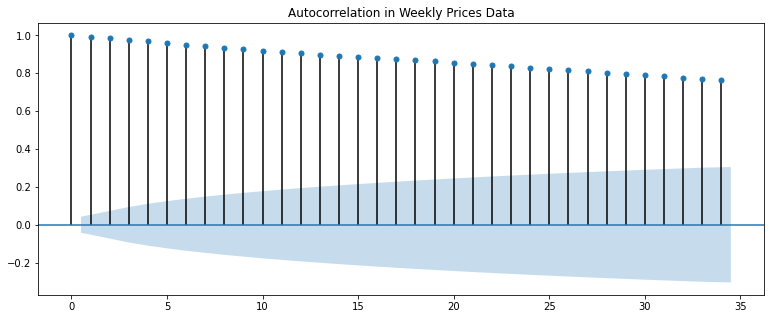

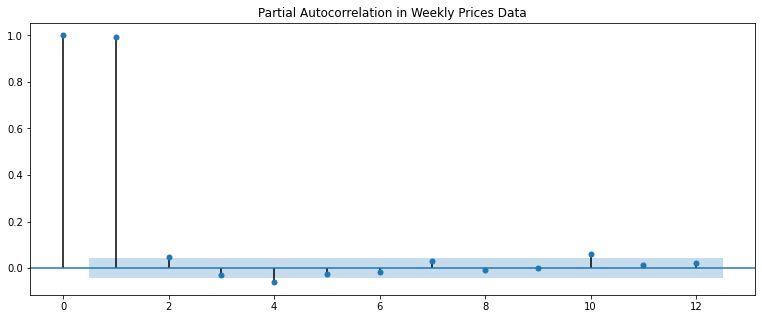

In [ ]:
print('\nWeekly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Weekly Data

acf_plot = plot_acf(apple_weekly['Close'],  title='Autocorrelation in Weekly Prices Data')

pacf_plot = plot_pacf(apple_weekly['Close'], lags=12, title='Partial Autocorrelation in Weekly Prices Data')



Monthly data Autocorrelation Plots


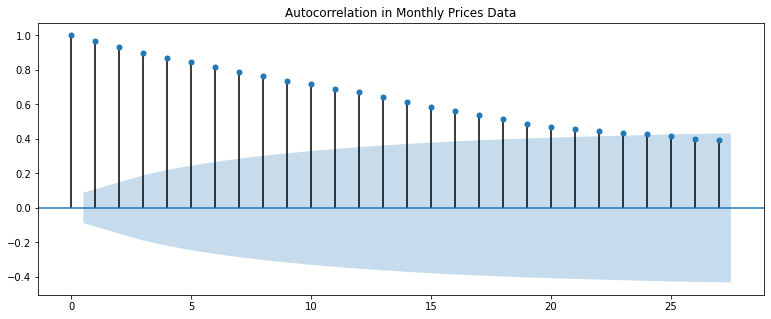

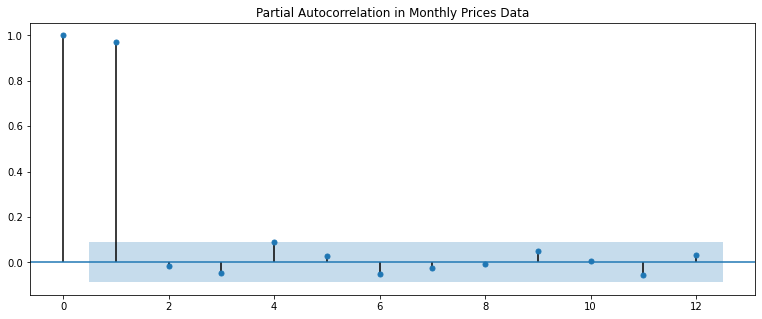

In [ ]:
print('\nMonthly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Monthly Data

acf_plot = plot_acf(apple_monthly['Close'],  title='Autocorrelation in Monthly Prices Data')

pacf_plot = plot_pacf(apple_monthly['Close'], lags=12, title='Partial Autocorrelation in Monthly Prices Data')



Quarterly data Autocorrelation Plots


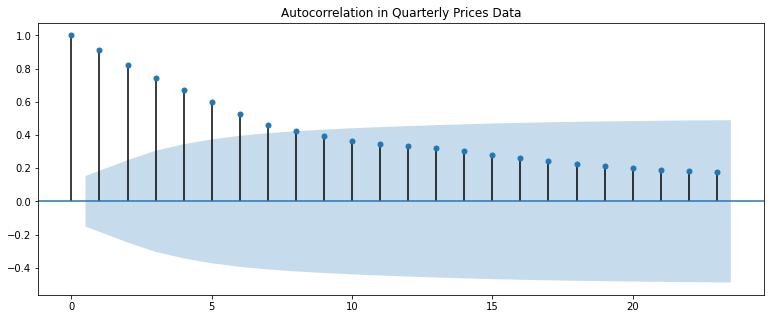

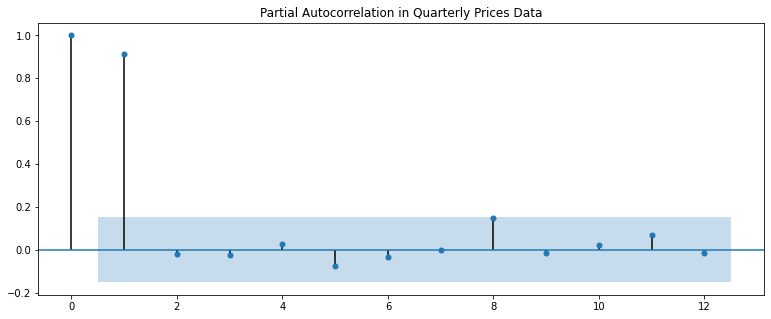

In [ ]:
print('\nQuarterly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data

acf_plot = plot_acf(apple_quarterly['Close'],  title='Autocorrelation in Quarterly Prices Data')

pacf_plot = plot_pacf(apple_quarterly['Close'], lags=12, title='Partial Autocorrelation in Quarterly Prices Data')


From the above PACF plots, **it appears that there is a strong order 1 (p=1) autocorrelation** for daily, weekly, monthly, or quarterly data. 

## Section 3 Time Series Decomposition

**Additive vs Multiplicative**
Time series models fall into two camps:

**Additive**:

Data = Trend + Seasonal + Random


**Multiplicative**:

Data = Trend x Seasonal x Random.

Multiplicative data can be easy to fit as Additive if we take the log
log(Data) = log(Trend x Seasonal x Random)

We should use multiplicative models when the percentage change of our data is more important than the absolute value change (e.g. stocks, commodities). If eihter seasonality or fluctuations are stable, we likely have an additive model.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# we will assume a weekly seanality (that is, freq=5)
ss_decomposition = seasonal_decompose(x=apple_share_price_data['Close'], model='additive', freq=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

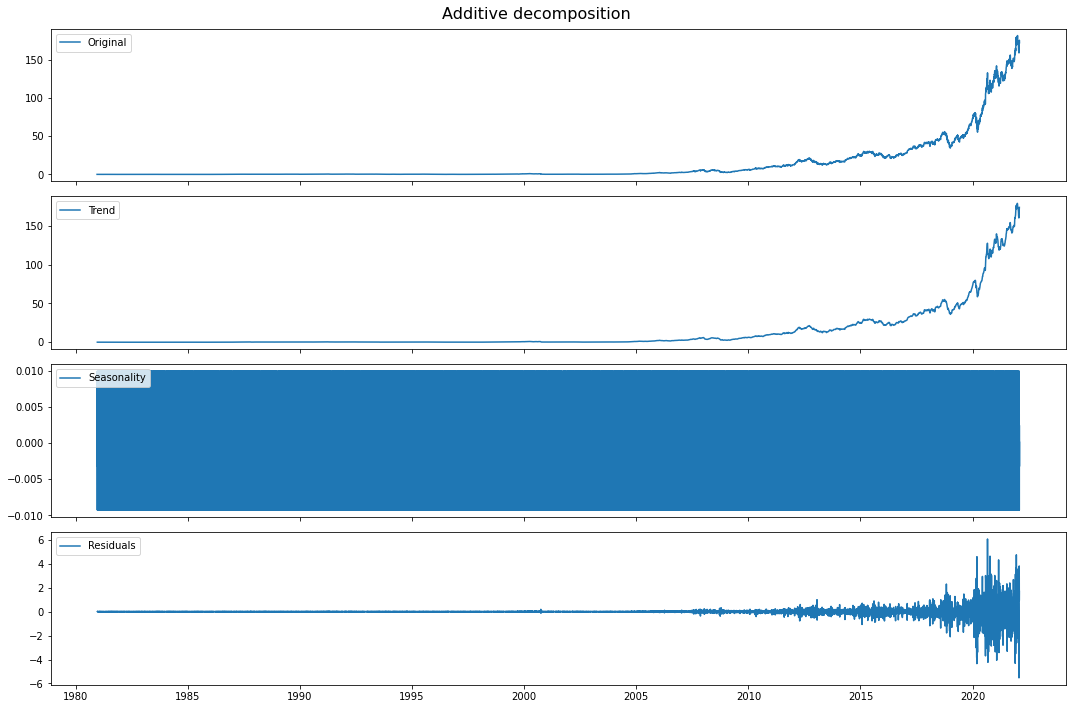

In [6]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle("Additive decomposition", fontsize=16)

#define apple_daily
apple_daily =apple_share_price_data[['Close']]

axes[0].plot(apple_daily, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [ ]:
ss_decomposition = seasonal_decompose(x=apple_share_price_data['Close'], model='multiplicative', freq=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

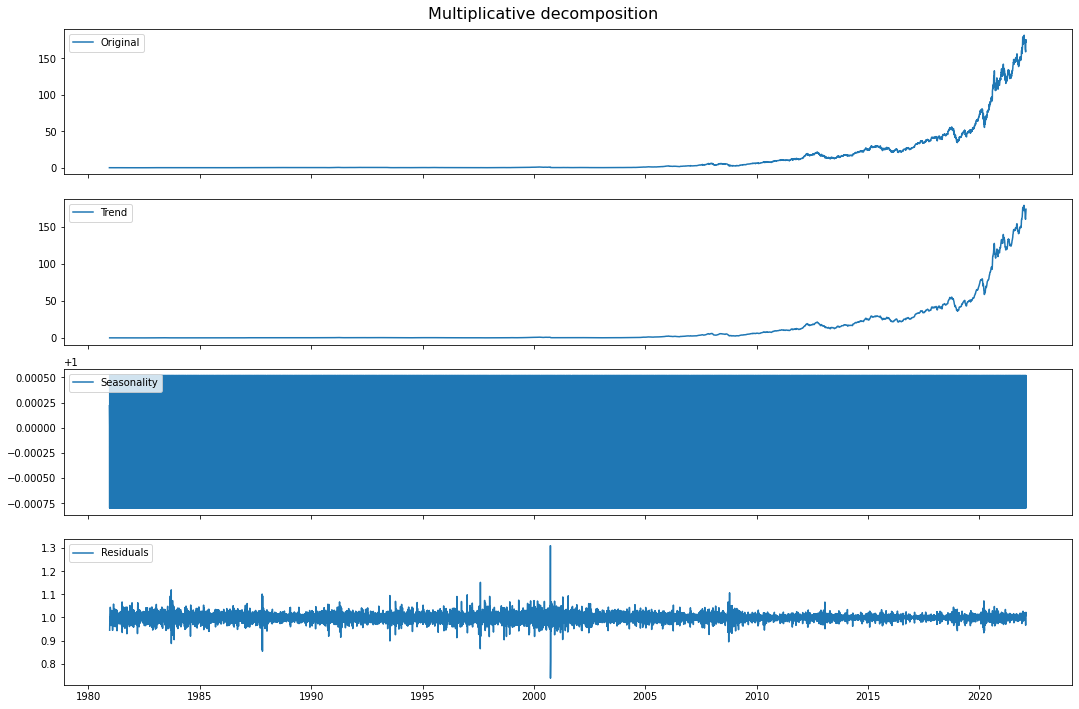

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle("Multiplicative decomposition", fontsize=16)

axes[0].plot(apple_daily, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

fig.tight_layout()
fig.subplots_adjust(top=0.95)

It appears using **multiplicative** model to decompose the stock data will lead to a residual that is much more closer to **stationality**. 

# Summary Statistics & Plots

## Examine if mean and variance are stationary. 

In [ ]:
# split data into 10 chunks
chunks = np.array_split(np.array(apple_share_price_data['Close']), indices_or_sections=10)

In [ ]:
# compare means and variances
print("{} | {:10} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 34)
for i, chunk in enumerate(chunks, 1):
    print("{:5d} | {:10.6f} | {:12.6f}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean       | Variance
----------------------------------
    1 |   0.094226 |     0.001170
    2 |   0.191892 |     0.010413
    3 |   0.344679 |     0.005089
    4 |   0.242813 |     0.004704
    5 |   0.393156 |     0.063558
    6 |   0.488562 |     0.114723
    7 |   3.406621 |     1.664512
    8 |  12.285265 |    17.042087
    9 |  26.622942 |    38.974156
   10 |  84.676613 |  1798.977880


Clealy the stock daily data is **non-stationary**. The non-stationality is confirmed by the histogram below. 

#### Histogram Plot

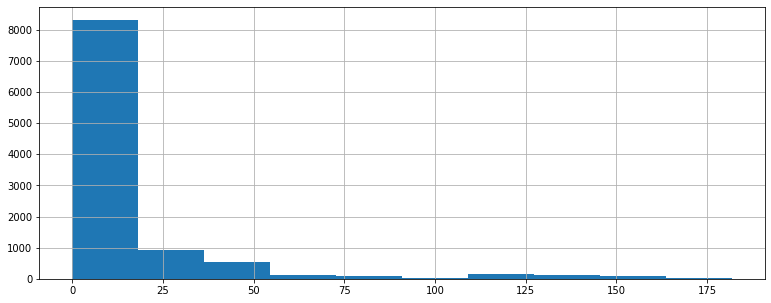

In [ ]:
pd.Series(apple_share_price_data['Close']).hist()

In [ ]:
str(203)

'203'

## Augmented Dickey-Fuller Test

In [ ]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries, window_sz=5, title=''):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_sz).mean()
    rolstd = timeseries.rolling(window=window_sz).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    title=title+ ' Rolling mean and standard deviation of window size ' + str(window_sz)
    plt.title(title)
    plt.grid()
    plt.show(block=False)

Test Statistic              6.819766
p-value                     1.000000
Lags Used                  39.000000
Observations Used       10336.000000
Critical Value (1%)        -3.430983
Critical Value (5%)        -2.861820
Critical Value (10%)       -2.566919
dtype: float64


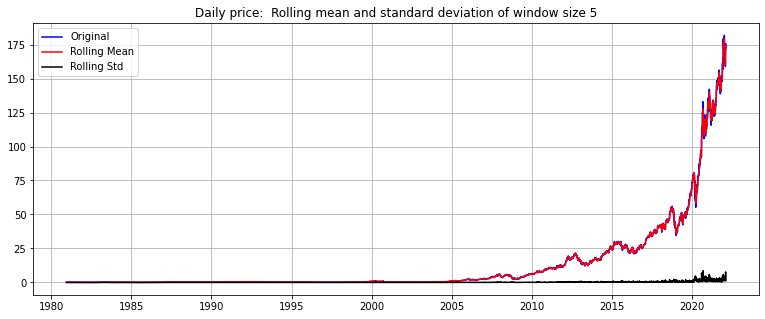

In [ ]:
dftest(apple_share_price_data['Close'], title='Daily price: ')

AD Fuller test shows that the stock daily data is **non-stationary**, as expected.

In [ ]:
import statsmodels.api as sm
sm.__version__
# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

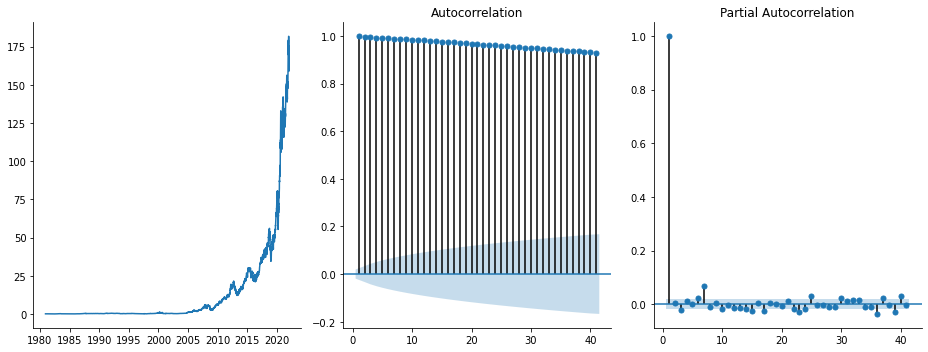

In [ ]:
plots(apple_share_price_data['Close'])

## Variable Transformations

In [ ]:
# Variable First Difference
print('Daily, First Difference \n', apple_daily.diff().tail())

# Variable Percent Change
print('\nDaily % Change \n', apple_daily.pct_change().tail())

# Log Sales
print('\nlog(1+Daily) \n', np.log(1 +  apple_daily).tail())

# Add % change to original data:
apple_daily.join(apple_daily.pct_change().add_suffix('_%_Change')).tail()

Daily, First Difference 
                Close
Date                
2022-01-31  4.444336
2022-02-01 -0.169785
2022-02-02  1.228439
2022-02-03 -2.936264
2022-02-04 -0.289993

Daily % Change 
                Close
Date                
2022-01-31  0.026126
2022-02-01 -0.000973
2022-02-02  0.007044
2022-02-03 -0.016720
2022-02-04 -0.001679

log(1+Daily) 
                Close
Date                
2022-01-31  5.167967
2022-02-01  5.167000
2022-02-02  5.173979
2022-02-03  5.157214
2022-02-04  5.155543


,Close,Close_%_Change
Date,,
2022-01-31,174.557602,0.026126
2022-02-01,174.387817,-0.000973
2022-02-02,175.616257,0.007044
2022-02-03,172.679993,-0.016720
2022-02-04,172.389999,-0.001679


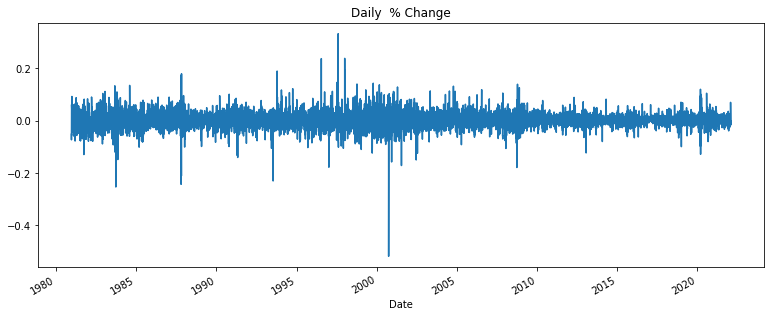

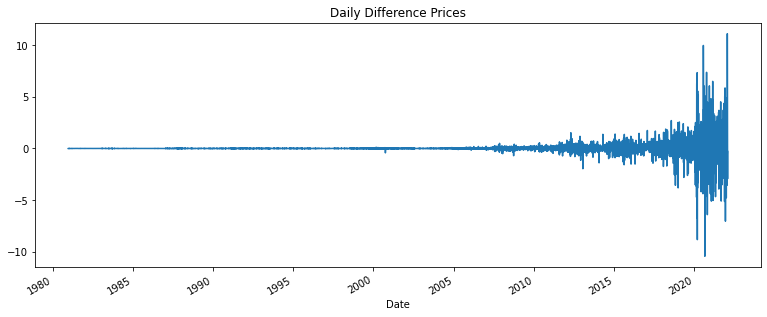

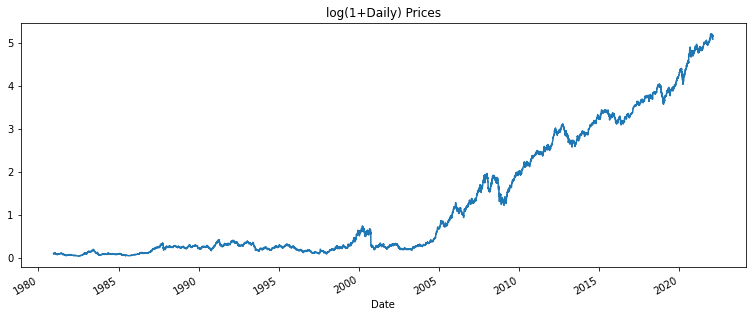

In [ ]:
# Daily Percent Change
apple_daily['Close'].pct_change().plot(figsize=plotsize, title='Daily  % Change')

# Daily difference
plt.figure()
apple_daily['Close'].diff().plot(figsize=plotsize, title='Daily Difference Prices')

# log(1+Daily)
plt.figure()
np.log(1+apple_daily['Close']).plot(figsize=plotsize, title='log(1+Daily) Prices')

Test Statistic            -29.145493
p-value                     0.000000
Lags Used                  11.000000
Observations Used       10363.000000
Critical Value (1%)        -3.430981
Critical Value (5%)        -2.861819
Critical Value (10%)       -2.566918
dtype: float64


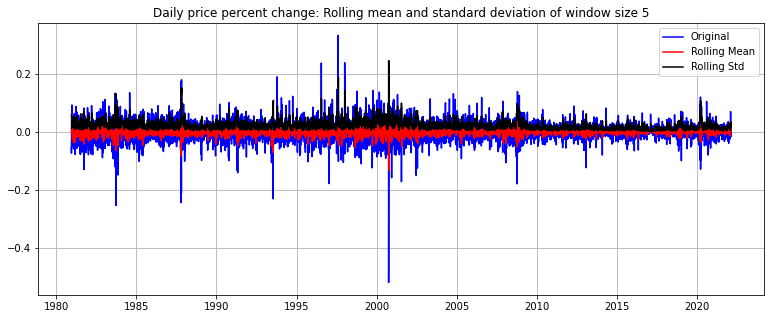

In [ ]:
dftest(apple_daily['Close'].pct_change().dropna(), title='Daily price percent change:')

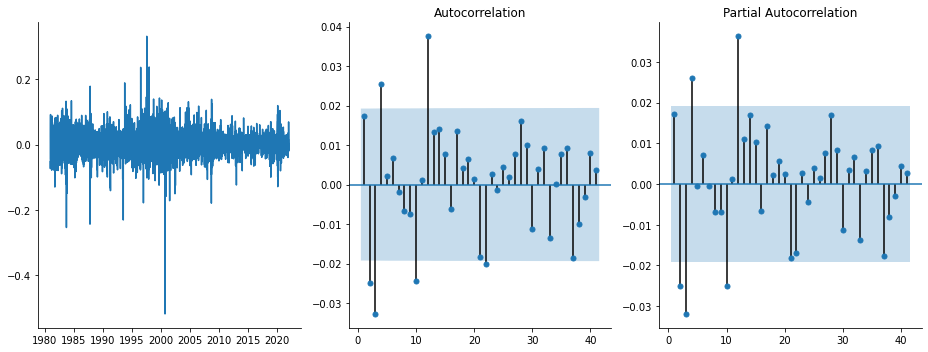

In [ ]:
plots(apple_daily['Close'].pct_change().dropna())

It appears that the daily percent change data is close to **stationality**. 

Test Statistic         -1.764733e+01
p-value                 3.734329e-30
Lags Used               3.900000e+01
Observations Used       1.033100e+04
Critical Value (1%)    -3.430983e+00
Critical Value (5%)    -2.861820e+00
Critical Value (10%)   -2.566919e+00
dtype: float64


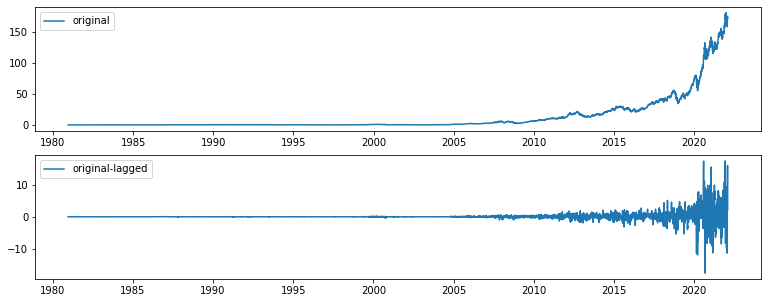

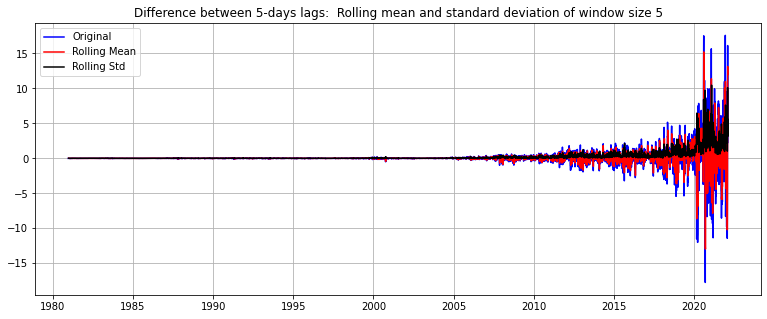

In [ ]:
# Important to note that when data have strong seasonality, the adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
lag_sz =5; 

apple_daily['lagged'] = apple_daily['Close'].shift(lag_sz)
apple_daily['diff_'] = apple_daily['Close'] - apple_daily['lagged']

fig,axes = plt.subplots(2,1)
axes[0].plot(apple_daily['Close'],label ='original')
axes[0].legend(loc='best')
axes[1].plot(apple_daily['diff_'],label = 'original-lagged')
plt.legend()
plt.figure()
dftest(apple_daily['diff_'].dropna(), title='Difference between 5-days lags: ')

## Section 4:  Smoothing Models

### 1. Simple Smoothing
Simple smoothing is the most obvious place to start. Consider the data above. How would you go about extracting information from this series? Naturally, your inclination may be to calculate the mean and use that as an estimate to represent the series. Let's try that.

In [7]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = np.mean(sq_diff)
    
    return mse

In [8]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(window))
    else:
        return cumulative_sum[window - 1:] / window

In [9]:
#Defining an error metric to see out of sample accuracy
def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()

In [10]:
#Defining an error metric to see out of sample accuracy
def mape_array(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    
    
    return abs(observations-estimates).sum()/observations.sum()

## Train/Test Split

We will hold out the last ten days' data for validating a model and all the rest of the historical data for training. That is, we will train a model with historical data except the last ten day's data hold out for testing. The MAPE of the prediciton of the 10 day's prices versus the true prices are then calculated. And then we compare the MAPE of different models. For each model, we will conduct a grid search of hyper-parameters by cross-validation. 

In [11]:
data=apple_share_price_data['Close']
test_sz =10;
train = data[:-test_sz]
test = data[-test_sz:]
data.shape

(10376,)

In [ ]:
data.head(), data.tail()

(Date
 1980-12-12    0.100326
 1980-12-15    0.095092
 1980-12-16    0.088112
 1980-12-17    0.090293
 1980-12-18    0.092911
 Name: Close, dtype: float64, Date
 2022-01-31    174.557602
 2022-02-01    174.387817
 2022-02-02    175.616257
 2022-02-03    172.679993
 2022-02-04    172.389999
 Name: Close, dtype: float64)

In [ ]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04'],
      dtype='object', name='Date', length=10376)

In [12]:
train.head(),train.tail()

(Date
 1980-12-12    0.100326
 1980-12-15    0.095092
 1980-12-16    0.088112
 1980-12-17    0.090293
 1980-12-18    0.092911
 Name: Close, dtype: float64, Date
 2022-01-14    172.849792
 2022-01-18    169.583939
 2022-01-19    166.018478
 2022-01-20    164.300659
 2022-01-21    162.203354
 Name: Close, dtype: float64)

In [13]:
test.head(15)

Date
2022-01-24    161.414337
2022-01-25    159.576691
2022-01-26    159.486801
2022-01-27    159.017410
2022-01-28    170.113266
2022-01-31    174.557602
2022-02-01    174.387817
2022-02-02    175.616257
2022-02-03    172.679993
2022-02-04    172.389999
Name: Close, dtype: float64

In [ ]:
# find mean of series
data_avg = np.mean(train)

# create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=data_avg, dtype='float')

# mse
simple_mse = mse(test.to_numpy(), simple_avg_preds)

# results
print("Predictions: \n", simple_avg_preds)
print("MSE: ", simple_mse)
# mape
simple_mape=mape_array(test.to_numpy(), simple_avg_preds)
# results
print("MAPE: ", simple_mape)

Predictions: 
 [12.71781943 12.71781943 12.71781943 12.71781943 12.71781943 12.71781943
 12.71781943 12.71781943 12.71781943 12.71781943]
MSE:  24134.451954340406
MAPE:  0.9242644403424813


In [ ]:
import matplotlib.dates as mdates

In [ ]:
def plot_forecast(data,preds, plot_last_days=30,  plotsize=(13,5), plt_title=""):
# data is a time series with date index and includes both train and test data. 

  time=data.index
  test_sz=len(preds)
  test = data[-test_sz:]
  plt.figure(figsize=plotsize)
  plot_last_days=plot_last_days
  plot_train_range=time[-plot_last_days:-test_sz]
  plt.plot(data[plot_train_range], 'b--', label="train")
  #ax=plt.gca()
  #ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
  #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
  plt.gcf().autofmt_xdate() # Rotation
  plt.plot(time[-test_sz:], test, color='orange', linestyle="--", label="test")
  plt.plot(time[-test_sz:], preds, 'r--', label="predictions")
  
  plt.legend(loc='upper left')
  plt.title(plt_title)
  plt.grid(alpha=0.5);
  
  plt.show()

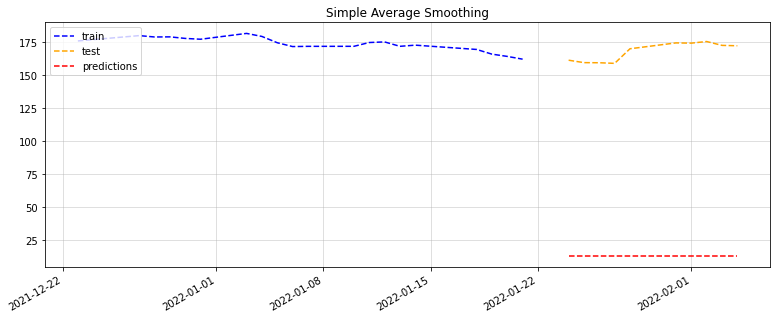

In [ ]:
plot_forecast(data,simple_avg_preds,plt_title="Simple Average Smoothing")

## Single Exponential Smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Predictions: 
 10366    162.364318
10367    162.364318
10368    162.364318
10369    162.364318
10370    162.364318
10371    162.364318
10372    162.364318
10373    162.364318
10374    162.364318
10375    162.364318
dtype: float64
MSE:  76.3983464357405
MAPE:  0.04497335190664541


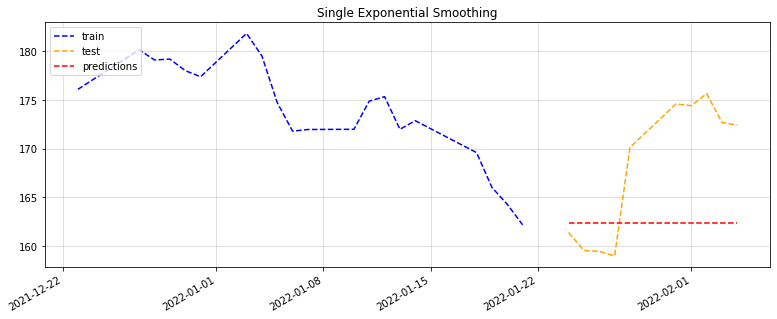

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test.to_numpy(), single_preds.to_numpy())
print("Predictions: \n", single_preds)
print("MSE: ", single_mse)

single_mape = mape_array(test.to_numpy(), single_preds.to_numpy())

print("MAPE: ", single_mape)

plot_forecast(data,single_preds,plt_title="Single Exponential Smoothing")

## Double Exponential Smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Predictions: 
 10366    162.513656
10367    162.639481
10368    162.765306
10369    162.891131
10370    163.016956
10371    163.142781
10372    163.268606
10373    163.394431
10374    163.520256
10375    163.646080
dtype: float64
MSE:  65.03660605473979
MAPE:  0.04232280811464993


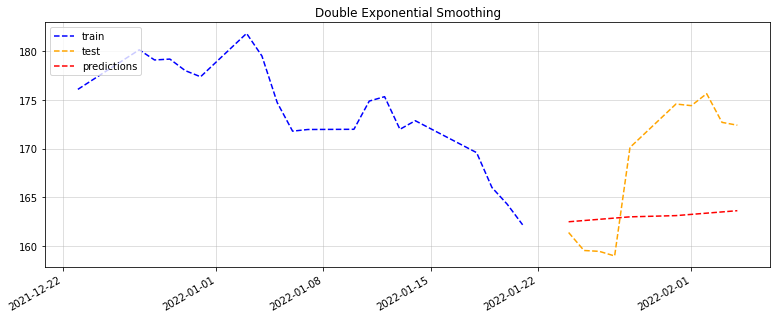

In [ ]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test.to_numpy(), double_preds.to_numpy())
print("Predictions: \n", double_preds)
print("MSE: ", double_mse)
#MAPE
double_mape = mape_array(test.to_numpy(), double_preds.to_numpy())

print("MAPE: ", double_mape)
# plot
plot_forecast(data,double_preds,plt_title="Double Exponential Smoothing")

## Triple Exponential

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
def grid_search_EXP(data,test_sz,trends=[None], seasonals=['multiplicative'],seasonal_periods = [5]):
    '''
    #data is a panda series contains both train and test data.
    
    '''
    train = data[:-test_sz]
    test = data[-test_sz:]

    best_mape = np.inf
    best_trend = None
    best_seasonal = None
    best_periods = None
    for trend_ in trends:
        for seasonal_ in seasonals:
            for seasonal_periods_ in seasonal_periods:
                
                triple = ExponentialSmoothing(train,
                              trend=trend_,
                              seasonal=seasonal_,
                              seasonal_periods=seasonal_periods_).fit(optimized=True)
                triple_preds = triple.forecast(len(test))
                triple_mape = mape_array(test.to_numpy(), triple_preds.to_numpy())

                if triple_mape<best_mape:
                    best_mape = triple_mape
                    best_trend = trend_
                    best_seasonal = seasonal_
                    best_periods = seasonal_periods_
    return (best_trend, best_seasonal, best_periods, best_mape)

### Conduct the grid search for trip exponential smoothing

In [ ]:
grid_search_EXP(data,test_sz,trends=[None,'additive','multiplicative'], seasonals=[None,'additive','multiplicative'],seasonal_periods = list(range(2,10)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated freq

('multiplicative', None, 2, 0.04077737747641139)

Next we use the searched hyper-parameters to build a best triple exponential smoohting model. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Predictions: 
 10366    162.523750
10367    162.356413
10368    162.523750
10369    162.356413
10370    162.523750
10371    162.356413
10372    162.523750
10373    162.356413
10374    162.523750
10375    162.356413
dtype: float64
MSE:  75.62010507768419
MAPE:  0.04488311581416183


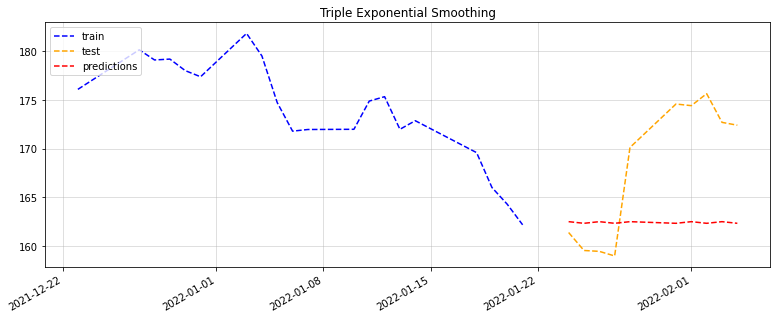

In [ ]:
triple = ExponentialSmoothing(train,
                              trend=None,
                              seasonal='multiplicative',
                              seasonal_periods=2).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test.to_numpy(), triple_preds.to_numpy())
print("Predictions: \n", triple_preds)
print("MSE: ", triple_mse)
#MAPE
triple_mape = mape_array(test.to_numpy(), triple_preds.to_numpy())

print("MAPE: ", triple_mape)
# plot
plot_forecast(data,triple_preds,plt_title="Triple Exponential Smoothing")

## Comparison of smoothing methods

In [ ]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
pd.options.display.float_format = '{:,.4f}'.format
print(df)
#MAPE
data_dict = {'MAPE':[simple_mape, single_mape, double_mape, triple_mape]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
pd.options.display.float_format = '{:,.4f}'.format
print(df)

               MSE
simple 24,134.4520
single     76.3983
double     65.0366
triple     75.6201
         MAPE
simple 0.9243
single 0.0450
double 0.0423
triple 0.0449


It appears among the smoothing method, **double exponential smoothing** outperforms other smoothing method. 

## Section 5: SARIMA with Statsmodels

When we are determining our ARIMA model we will come across the following standard inputs:

**ARMA order(p,d,q)**:
- p is number of AR terms
- d is number of times that we would difference our data
- q is number of MA terms

When we work with SARIMA models 'S' refers to 'seasonal' and we have the additional standard inputs:

**Seasonal order(P,D,Q)**:
- P is number of AR terms in regards to seasonal lag
- D is number of times that we would difference our seasonal lag (as seen above)
- Q is number of MA terms in regards to seasonal lag
- S is number of periods in a season

Some rules to highlight from the [Duke ARIMA Guide](https://people.duke.edu/~rnau/411arim3.htm):

- If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.
- If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. 
- If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. BEWARE OF OVERDIFFERENCING!!
- A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model)

### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

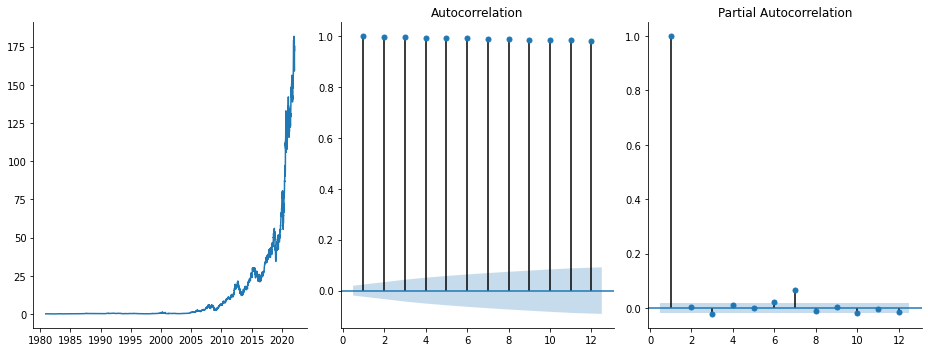

In [ ]:
plots(apple_daily['Close'], lags=12);

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


## Cross-Validation
When deciding on a model, often what truly matters is how well we would be able to produce out of sample predictions. Here we create a function that looks at multiple out of sample predictions to see which model had lowest out-of-sample error

In [ ]:
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[i+horizon]); #horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [ ]:
def grid_search_ARIMA(series,horizon,start,step_size,orders = [(1,0,0)],seasonal_orders = [(0,0,0,0)],trends=[None]):
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None
    best_trend = None
    for order_ in orders:
        for seasonal_order_ in seasonal_orders:
            for trend_ in trends:
                
                cv = cross_validate(series,
                                    horizon,
                                    start,
                                    step_size,
                                    order = order_,
                                    seasonal_order = seasonal_order_,
                                    trend=trend_)
                if mape(cv)<best_mape:
                    best_mape = mape(cv)
                    best_order = order_
                    best_seasonal_order = seasonal_order_
                    best_trend = trend_
    return (best_order,best_seasonal_order, best_trend, best_mape)
    

In [ ]:
def grid_search_SARIMA(series,test_sz=10, orders = [(1,0,0)],seasonal_orders = [(0,0,0,0)],trends=[None]):
  # series contains both train and test data. 
    train=series[:-test_sz]
    test=series[-test_sz:]
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None
    best_trend = None
    best_model=None
    for order_ in orders:
        for seasonal_order_ in seasonal_orders:
            for trend_ in trends:
                
                model = sm.tsa.statespace.SARIMAX(train, #only using data through to and including start 
                                order=order_, 
                                seasonal_order=seasonal_order_, 
                                trend=trend_).fit()
                forecasted=model.forecast(steps= test_sz); #horizon)[-1]) #forecasting horizon steps into the future
                forecast_mape = mape_array(test.to_numpy(), forecasted.to_numpy())
                if forecast_mape < best_mape:
                    best_model=model
                    best_mape = forecast_mape
                    best_order = order_
                    best_seasonal_order = seasonal_order_
                    best_trend = trend_
    result = {'model':best_model,'mape':best_mape,'order':best_order, 'seasonal_order':best_seasonal_order,'trend':best_trend}                
    return result

In [ ]:
series=apple_daily['Close']
orders=[(1,1,0), (1,0,0), (1,1,1), (1,0,1)]
seasonal_orders=[(0,0,0,0),(1,0,1,2), (1,1,1,2), (1,1,0,2)]
trends=[None,'c']
cv=grid_search_SARIMA(series, test_sz=10, orders=orders, seasonal_orders=seasonal_orders,trends=trends)

In [ ]:
cv

{'mape': 0.04156728733847033,
 'model': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x7f80a7bde2d0>,
 'order': (1, 1, 1),
 'seasonal_order': (1, 1, 1, 2),
 'trend': None}

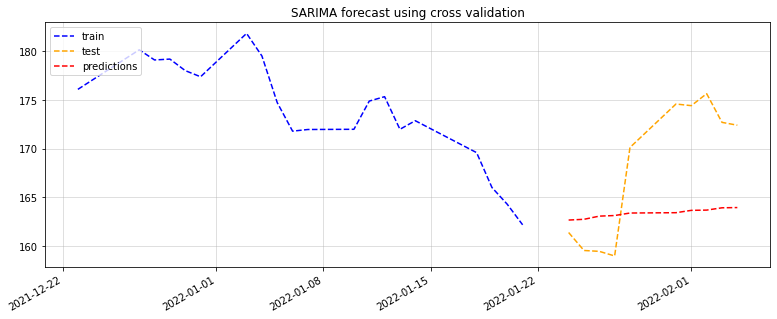

MAPE:  0.04156728733847033


In [ ]:
model=cv['model']
forecasted=model.forecast(steps= test_sz);                                
plot_forecast(series,forecasted.squeeze(),plt_title="SARIMA forecast using cross validation")
#MAPE
forecast_mape = mape_array(test.to_numpy(), forecasted.to_numpy())
print("MAPE: ", forecast_mape)

### Statistical Tests


- [Normality (Jarque-Bera)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality)
    - Null hypothesis is normally distributed residuals (good, plays well with RMSE and similar error metrics)

- [Serial correlation (Ljung-Box)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation)
    - Null hypothesis is no serial correlation in residuals (independent of each other)

- [Heteroskedasticity](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity)
    - Tests for change in variance between residuals.
    - The null hypothesis is no heteroskedasticity. That means different things depending on which alternative is selected:
        - Increasing: Null hypothesis is that the variance is not increasing throughout the sample; that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.
        - Decreasing: Null hypothesis is that the variance is not decreasing throughout the sample; that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample.
        - Two-sided (default): Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

- [Durbin Watson](https://en.wikipedia.org/wiki/Durbin–Watson_statistic)
    - Tests autocorrelation of residuals: we want between 1-3, 2 is ideal (no serial correlation)

In [ ]:
# create and run statistical tests on model
sar=model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]

# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3e}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3e}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3e}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=1853052.913, p=0.000e+00
Ljung-Box: val=585.879, p=3.897e-98
Heteroskedasticity: val=21248.766, p=0.000e+00
Durbin-Watson: d=1.99


The tests show that the residual of the best SARIMA model is not normally distributed, heteroskedastical. However, it seems the there is no much auto correlation in residuals. 

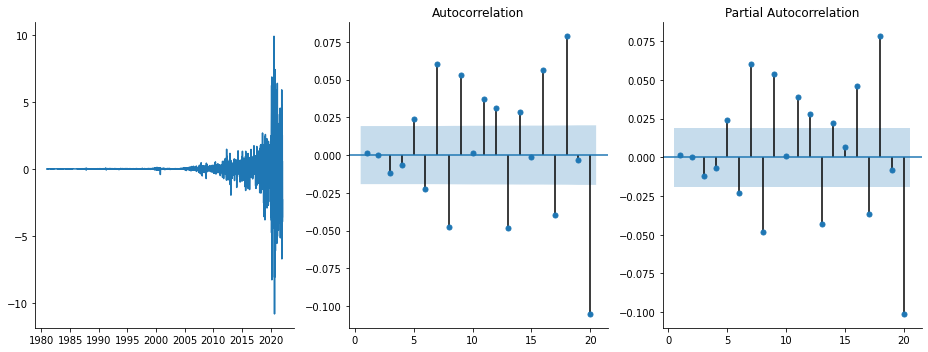

In [ ]:
# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=20);

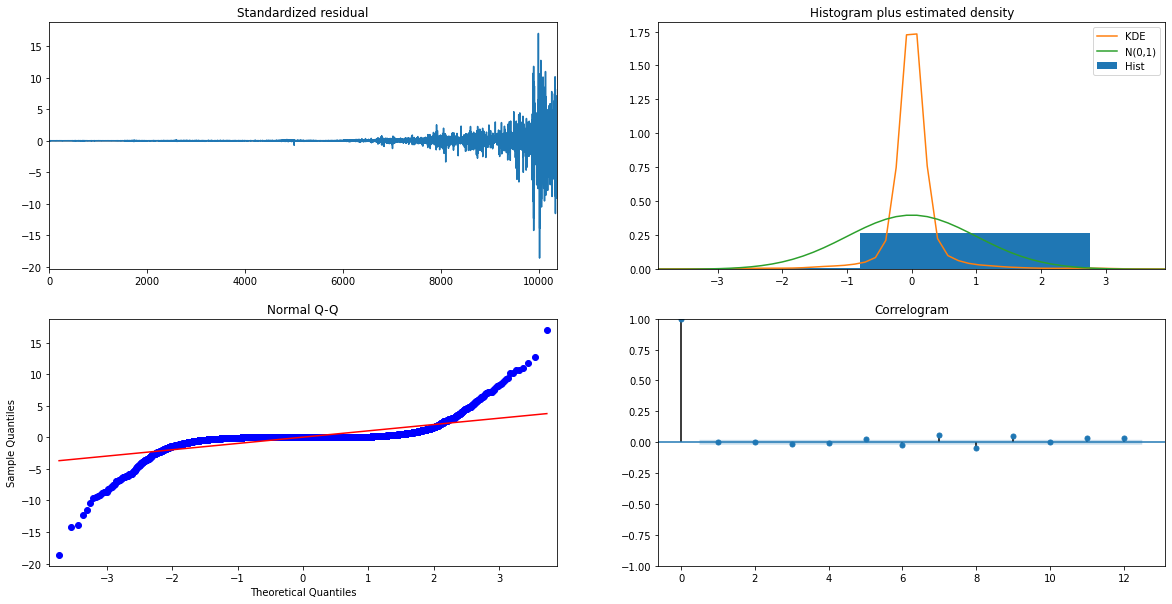

In [ ]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

 ### Plot out-of-sample prediction and confidence intervals

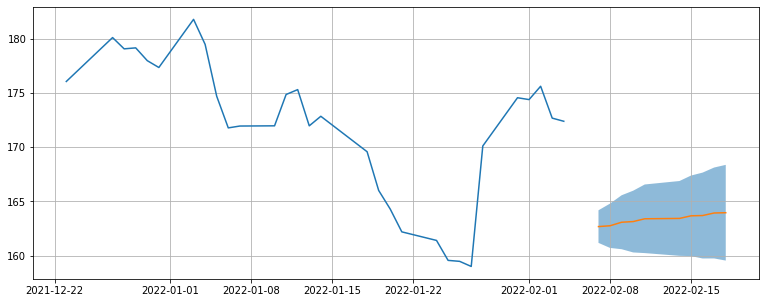

In [ ]:
plt.figure(figsize=plotsize)
# can use get forecast to create a forecast object
fcst_horizon =10;
future_fcst = sar.get_forecast(fcst_horizon)
# That will have a method to pull in confidence interval 
confidence_int = future_fcst.conf_int(alpha = 0.01)
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
fcst.index=pd.date_range(start=apple_daily.index[-1]+timedelta(days=1),periods=fcst_horizon,freq='B' )
confidence_int.index= pd.date_range(start=apple_daily.index[-1]+timedelta(days=1),periods=fcst_horizon,freq='B' )
# Plot predictions and confidence intervals
plt.plot(apple_daily[-30:]['Close'])
plt.plot(fcst)
plt.fill_between(confidence_int.index,confidence_int['lower Close'],confidence_int['upper Close'],alpha = 0.5)
plt.grid()

## Use pmdarima to build a model. 

Next we use the python library pmdarima to automatically perform a grid search of hyper-parameters and build a model. 

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.6 MB/s 
     |████████████████████████████████| 9.8 MB 44.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:

import pmdarima as pm

In [ ]:
#from pyramid.arima import auto_arima. We assume there is a seasonality of 5. 
stepwise_model = pm.auto_arima(apple_daily['Close'][:-test_sz], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=2,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,1)[2]             : AIC=26203.515, Time=1.15 sec
 ARIMA(0,2,0)(0,0,0)[2]             : AIC=26254.658, Time=0.37 sec
 ARIMA(1,2,0)(1,0,0)[2]             : AIC=20950.111, Time=2.55 sec
 ARIMA(0,2,1)(0,0,1)[2]             : AIC=inf, Time=5.15 sec
 ARIMA(1,2,0)(0,0,0)[2]             : AIC=22574.071, Time=0.71 sec
 ARIMA(1,2,0)(2,0,0)[2]             : AIC=20291.462, Time=2.53 sec
 ARIMA(1,2,0)(2,0,1)[2]             : AIC=inf, Time=9.40 sec
 ARIMA(1,2,0)(1,0,1)[2]             : AIC=inf, Time=5.01 sec
 ARIMA(0,2,0)(2,0,0)[2]             : AIC=26204.781, Time=0.61 sec
 ARIMA(1,2,1)(2,0,0)[2]             : AIC=inf, Time=4.53 sec
 ARIMA(0,2,1)(2,0,0)[2]             : AIC=inf, Time=3.43 sec
 ARIMA(1,2,0)(2,0,0)[2] intercept   : AIC=20293.449, Time=7.74 sec

Best model:  ARIMA(1,2,0)(2,0,0)[2]          
Total fit time: 43.345 seconds
20291.461855378508


In [ ]:
print('order: ',stepwise_model.order)
print('seasonal order: ',stepwise_model.seasonal_order)

order:  (1, 2, 0)
seasonal order:  (2, 0, 0, 2)


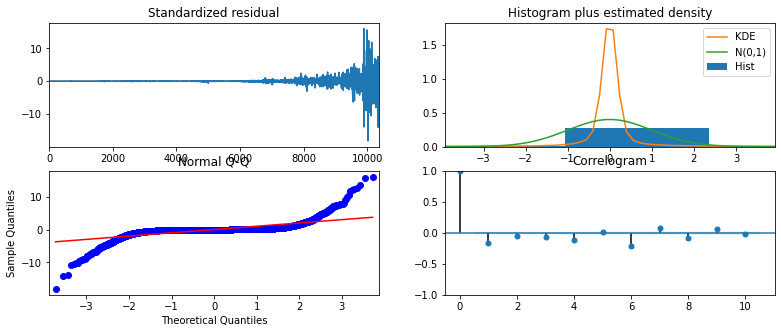

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
from dateutil.relativedelta import relativedelta
def future_preds_df(model,series,num_days):  #num_months: prediction horizon
   # pred_first = series.index.max()+relativedelta(days=1)
    #pred_last = series.index.max()+relativedelta(days=num_days)
    #date_range_index = pd.date_range(pred_first,pred_last,freq = 'B')
    date_range_index=pd.date_range(start=series.index[-1]+timedelta(days=1),periods=num_days,freq='B' )
    vals = model.predict(n_periods = num_days)
    return pd.DataFrame(vals,index = date_range_index)

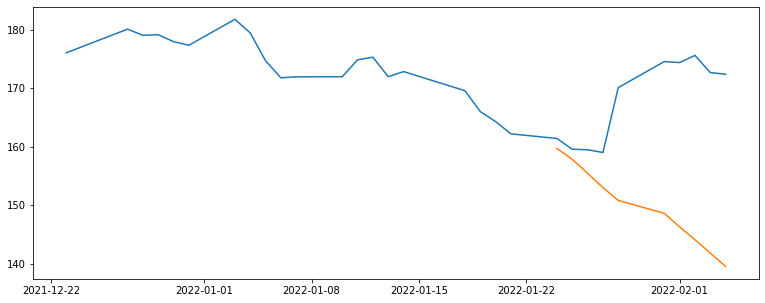

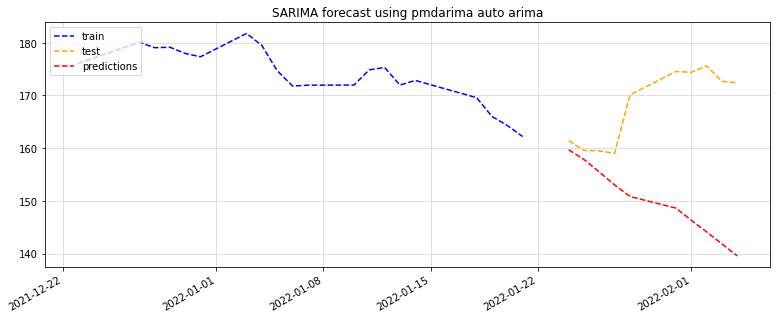

MAPE:  1.085106638421844


In [ ]:
forecasted = future_preds_df(stepwise_model,apple_daily['Close'][:-test_sz], 10)
plt.figure(figsize=plotsize)
plt.plot(apple_daily['Close'][-30:])
plt.plot(forecasted)
plot_forecast(data,forecasted.squeeze(),plt_title="SARIMA forecast using pmdarima auto arima")
#MAPE
forecast_mape = mape_array(test.to_numpy(), forecasted.to_numpy())
print("MAPE: ", forecast_mape)

## Section 5: Predicting with Facebook Prophet

Today Facebook is open sourcing Prophet, a forecasting tool available in Python and R. The idea is that producing high quality forecasts is not an easy problem for either machines or for most analysts. The models revolves around two main observations in the practice of creating a variety of business forecasts:

Completely automatic forecasting techniques can be brittle and they are often too inflexible to incorporate useful assumptions or heuristics.
Analysts who can produce high quality forecasts are quite rare because forecasting is a specialized data science skill requiring substantial experience.
Prophet is an **general additive model** (GAM) that includes a number of highly advanced, intelligent forecasting methods, including changepoint analysis:

y = g(t) + s(t) + h(t) +  ϵt 

Here g(t) is the trend function which models non-periodic changes in the value of the time series, s(t) represents periodic changes (e.g., weekly and yearly seasonality), and h(t) represents the effects of holidays which occur on potentially irregular schedules over one or more days.

- For trend, a piecewise linear or logistic growth curve trend is used.
Prophet automatically detects changes in trends by selecting changepoints from the data.
- For seasonalities, different seasonality components are modeled using Fourier series.
- One can either use fb provided list or incorporate their own holidays into model.

Prophet was originally optimized with the business forecast tasks encountered at Facebook in mind, which typically have any of the following characteristics:

- Hourly, daily, or weekly observations with at least a few months (preferably a year) of history.
- Strong multiple “human-scale” seasonalities: day of week and time of year.
- Important holidays that occur at irregular intervals that are known in advance.
- A reasonable number of missing observations or large outliers.
- Historical trend changes, for instance due to product launches or logging changes.
- Trends that are non-linear growth curves, where a trend hits a natural limit or saturates.

In [ ]:
from fbprophet import Prophet
plt.rcParams['figure.figsize'] = [14, 4]


In [ ]:
# change to Prophet format ds and y column
series=pd.DataFrame(apple_daily['Close'])
series.reset_index(inplace=True)
series.columns=['ds','y']

series.tail()

,ds,y
10371,2022-01-31,174.5576
10372,2022-02-01,174.3878
10373,2022-02-02,175.6163
10374,2022-02-03,172.6800
10375,2022-02-04,172.3900


In [ ]:
# dataframe must have ds column with type datetime and y column which is time series we are trying to predict
series.head()

,ds,y
0,1980-12-12,0.1005
1,1980-12-15,0.0952
2,1980-12-16,0.0882
3,1980-12-17,0.0904
4,1980-12-18,0.0930


In [ ]:
def grid_search_Prophet(series,test_sz=10, changepoint_prior_scales = [0.0005],
                        seasonality_prior_scales = [0.01], seasonality_modes=['additive']):
  # series contains both train and test data. 
    train=series[:-test_sz]
    test=series[-test_sz:]
    best_mape=np.inf
    best_change_scale = None
    best_season_scale = None
    best_mode=None
    
    for change_ in changepoint_prior_scales:
        for season_ in seasonality_prior_scales:
          for mode_ in seasonality_modes:
                            
             m = Prophet(seasonality_prior_scale=season_,
                         changepoint_prior_scale=change_, seasonality_mode=mode_)
             m.fit(train)
             future = m.make_future_dataframe(periods = test_sz,freq = 'B') # could also leave default freq of days and do 31 for period
             forecast = m.predict(future)
             preds=forecast.yhat.tail(test_sz); #horizon)[-1]) #forecasting horizon steps into the future
             forecast_mape = mape_array(test.y.to_numpy(), preds.to_numpy())
             if forecast_mape < best_mape:
                best_model=m
                best_mape = forecast_mape
                best_change_scale = change_
                best_season_scale = season_
                best_mode=mode_
                best_future=future
                
    result = {'model':best_model,'future':best_future, 'mape':best_mape,'changepoint_prior_scale':best_change_scale, 'seasonality_prior_scale':best_season_scale, 'mode':best_mode}                
    return result

In [ ]:
test_sz=10;
changepoint_prior_scales = [0.001, 0.01, 0.1, 0.5,1]
seasonality_prior_scales = [0.01, 0.1, 1.0, 10.0]
seasonality_modes=['additive','multiplicative']

results=grid_search_Prophet(series,test_sz, changepoint_prior_scales = changepoint_prior_scales,
                        seasonality_prior_scales = seasonality_prior_scales, seasonality_modes=seasonality_modes)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [ ]:
results

{'changepoint_prior_scale': 1, 'future':               ds
 0     1980-12-12
 1     1980-12-15
 2     1980-12-16
 3     1980-12-17
 4     1980-12-18
 ...          ...
 10371 2022-01-31
 10372 2022-02-01
 10373 2022-02-02
 10374 2022-02-03
 10375 2022-02-04
 
 [10376 rows x 1 columns], 'mape': 0.3143940914340431, 'mode': 'additive', 'model': <fbprophet.forecaster.Prophet at 0x7f80b68cae90>, 'seasonality_prior_scale': 1.0}

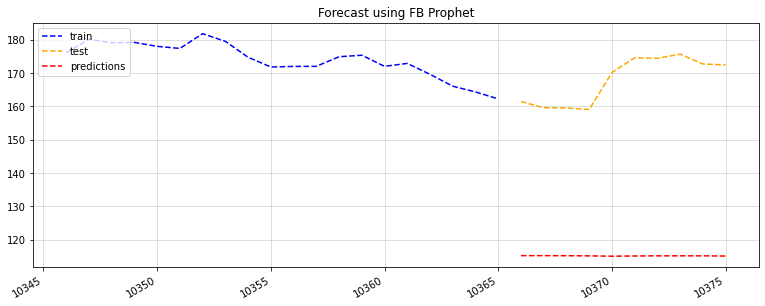

MAPE:  0.3143940914340431


In [ ]:
df_train = series[:-test_sz]
df_test = series[-test_sz:]
forecast = results['model'].predict(results['future'])
preds=forecast.yhat.tail(test_sz); #horizon)[-1]) #forecasting horizon steps into the future
forecast_mape = mape_array(df_test.y.to_numpy(), preds.to_numpy())
                             
plot_forecast(series.y,preds,plt_title="Forecast using FB Prophet")
#MAPE

print("MAPE: ", forecast_mape)


## Section 7: Deep learning models: RNN and LSTM

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [13]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(n_days):] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Price - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Dates')
    plt.ylabel('Price')
    plt.grid(alpha=0.3)

In [14]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_hours, 
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 3
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [15]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs,batch_size=64):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=0)
    
    return model

In [16]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(test_X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    test_hours = test_X_init.shape[0]+len(y)
    predict_range = range(test_X_init.shape[0]+1, test_hours+1)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init,'b--',label='train')
    #and test and actual preds
    plt.plot(predict_range, y, color='orange',linestyle="--", label="test")
    plt.plot(predict_range, y_preds, color='r', linestyle='--',label="predictions")
    
    plt.title(title)
    plt.legend()

In [17]:
def predict_and_plot2(dateindex,test_X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    test_hours = test_X_init.shape[0]+len(y)
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    #start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    start_range=dateindex[-test_hours:-len(y)]
    
    #predict_range = range(test_X_init.shape[0]+1, test_hours+1)  #predict range is going to be from end of X_init to length of test_hours
    predict_range=dateindex[-len(y):]
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init,'b--',label='train')
    #and test and actual preds
    plt.plot(predict_range, y, color='orange',linestyle="--", label="test")
    plt.plot(predict_range, y_preds, color='r', linestyle='--',label="predictions")
    
    plt.title(title)
    plt.legend()

In [18]:
def grid_search_simpleRNN(series,test_sz=10, input_hours=[10], cells = [10],epochs=[10]):
  # series contains both train and test data. 
   series_days = len(series) 
   best_mape=np.inf
   best_cell = None
   best_epoch = None
   best_input =None
   best_preds=None
    
    
   for epoch_ in epochs:
        for cell_ in cells:
           for input_ in input_hours:                   
               input_hour = input_
               test_hours = input_hour+test_sz
               train_X, test_X_init, train_y, test_y = \
               get_train_test_data(series, 'Close', series_days, 
                         input_hour, test_hours)
               model = fit_SimpleRNN(train_X, train_y, cell_units=cell_, epochs=epoch_)
               preds=predict(test_X_init, test_sz, model)
               forecast_mape = mape_array(test_y, preds.squeeze())
               if forecast_mape < best_mape:
                 best_model=model
                 best_mape = forecast_mape
                 best_cell = cell_
                 best_epoch = epoch_
                 best_input=input_ 
                 best_preds=preds   
                
   result = {'model':best_model, 'mape':best_mape,'cell_units':best_cell, 'input':best_input, 'epochs':best_epoch,'predicted':best_preds} 
   #print(result)               
   return result

In [49]:
result=grid_search_simpleRNN(apple_daily,test_sz=10, input_hours=[ 20], cells = [  30],epochs= [2000])
result

{'cell_units': 30,
 'epochs': 2000,
 'input': 20,
 'mape': 0.0420629734568483,
 'model': <keras.engine.sequential.Sequential at 0x7f60cb05ed50>,
 'predicted': array([[162.73587],
        [163.18115],
        [163.44743],
        [163.60382],
        [163.69292],
        [163.74277],
        [163.77039],
        [163.7856 ],
        [163.79395],
        [163.79852]], dtype=float32)}

In [20]:
def plot_RNN_LSTM_validation(series,column_nm, y_preds,input_hour,test_sz=10,  title=""):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    dateindex=series.index
    test_hours = input_hour+test_sz
    test_X_init=series[column_nm][-test_hours:-test_sz]
    y=series[column_nm][-test_sz:]
    
    # Below ranges are to set x-axes
    #start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    start_range=dateindex[-test_hours:-len(y)]
    
    #predict_range = range(test_X_init.shape[0]+1, test_hours+1)  #predict range is going to be from end of X_init to length of test_hours
    predict_range=dateindex[-len(y):]
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init,'b--',label='train')
    #and test and actual preds
    plt.plot(predict_range, y, color='orange',linestyle="--", label="test")
    plt.plot(predict_range, y_preds, color='r', linestyle='--',label="predictions")
    
    plt.title(title)
    plt.legend()

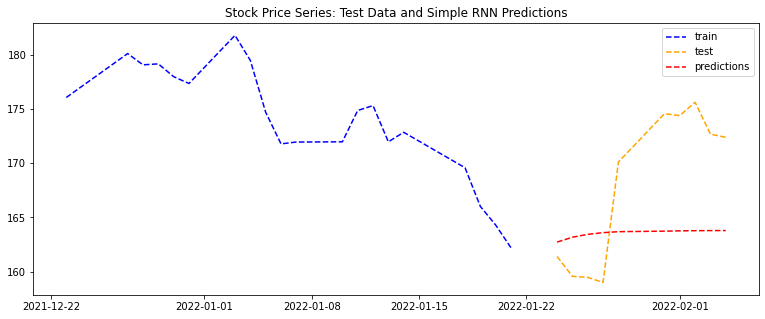

In [50]:
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f60cbf8a750>, 'mape': 0.024480720174351666, 'cell_units': 30, 'input': 20, 'epochs': 2000, 'predicted': array([[164.36203],
       [166.41142],
       [168.86787],
       [171.20416],
       [173.02658],
       [174.1947 ],
       [174.83005],
       [175.14124],
       [175.28523],
       [175.35005]], dtype=float32)}


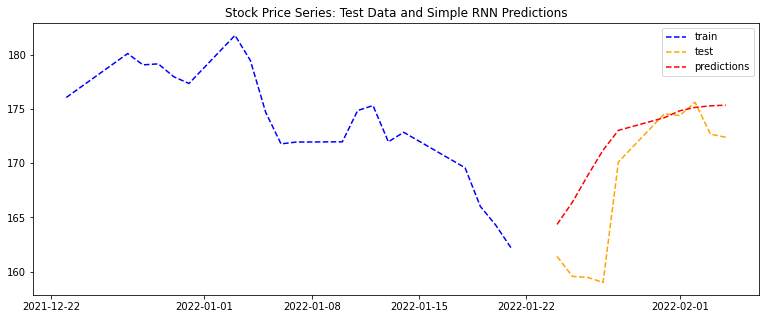

In [37]:
result=grid_search_simpleRNN(apple_daily,test_sz=10, input_hours=[ 20], cells = [  30],epochs= [2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

In [19]:
result=grid_search_simpleRNN(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs= [2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f06ffab4ad0>, 'mape': 0.10838136180961856, 'cell_units': 30, 'input': 30, 'epochs': 2000, 'predicted': array([[159.88399],
       [157.3312 ],
       [154.52798],
       [151.68292],
       [149.14737],
       [147.13155],
       [145.64854],
       [144.6043 ],
       [143.88657],
       [143.39742]], dtype=float32)}


NameError: ignored

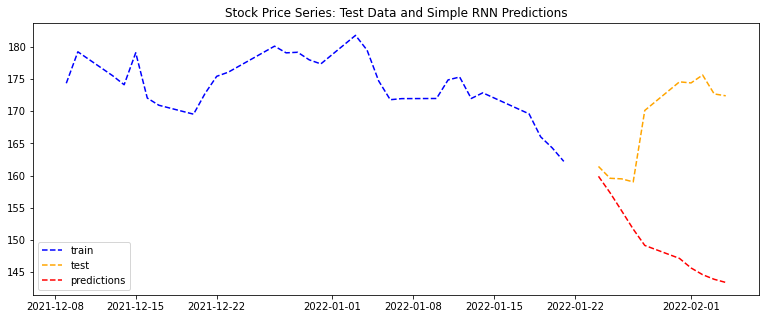

In [21]:
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

Note that there is a significant amount of randomness in neural network training - we may need to retrain the model a few times in order to get results that we're happy with.

{'model': <keras.engine.sequential.Sequential object at 0x7f06fb549650>, 'mape': 0.10866180531872023, 'cell_units': 30, 'input': 30, 'epochs': 2000, 'predicted': array([[160.1437 ],
       [157.82817],
       [155.47546],
       [153.02403],
       [149.99557],
       [145.63776],
       [143.62033],
       [143.579  ],
       [143.6774 ],
       [143.78947]], dtype=float32)}


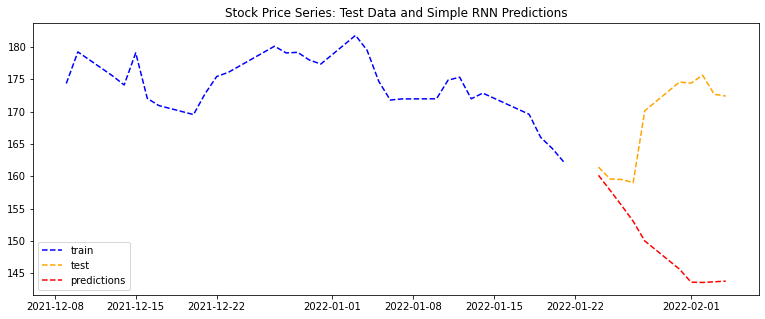

In [22]:
result=grid_search_simpleRNN(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs= [2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

In [ ]:
result['model'].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 30)                960       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


{'model': <keras.engine.sequential.Sequential object at 0x7f06f576d6d0>, 'mape': 0.08258570205706309, 'cell_units': 30, 'input': 30, 'epochs': 2000, 'predicted': array([[157.282  ],
       [155.77144],
       [154.75731],
       [154.0971 ],
       [153.65   ],
       [153.33894],
       [153.11726],
       [152.9564 ],
       [152.83815],
       [152.75034]], dtype=float32)}


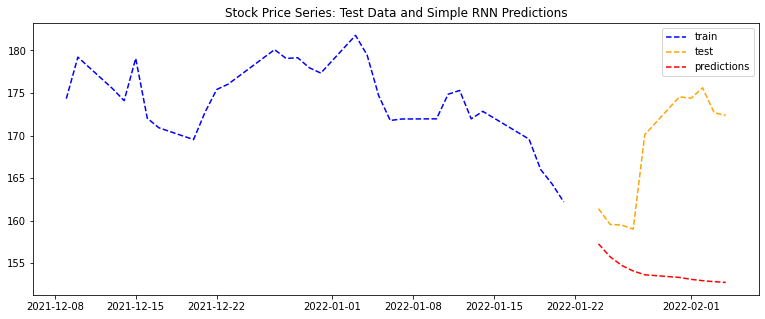

In [24]:
result=grid_search_simpleRNN(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs= [2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and Simple RNN Predictions")

## LSTM

In this section, we'll build on our previous work by introducing LSTM models as an enhancement to the RNNs we've trained so far. Our first step will be to write a new function for fitting an LSTM with keras - notice that it's almost the same as our simple RNN function, with LSTM substitued for SimpleRNN.

In [25]:
def fit_LSTM(train_X, train_y, cell_units, epochs,batchsize=64):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=batchsize, verbose=0)
    
    return model

In [26]:
def grid_search_LSTM(series,test_sz=10, input_hours=[10], cells = [10],epochs=[10]):
  # series contains both train and test data. 
   series_days = len(series) 
   best_mape=np.inf
   best_cell = None
   best_epoch = None
   best_input =None
   best_preds=None
    
    
   for epoch_ in epochs:
        for cell_ in cells:
           for input_ in input_hours:                   
               input_hour = input_
               test_hours = input_hour+test_sz
               train_X, test_X_init, train_y, test_y = \
               get_train_test_data(series, 'Close', series_days, 
                         input_hour, test_hours)
               model = fit_LSTM(train_X, train_y, cell_units=cell_, epochs=epoch_)
               preds=predict(test_X_init, test_sz, model)
               forecast_mape = mape_array(test_y, preds.squeeze())
               if forecast_mape < best_mape:
                 best_model=model
                 best_mape = forecast_mape
                 best_cell = cell_
                 best_epoch = epoch_
                 best_input=input_ 
                 best_preds=preds   
                
   result = {'model':best_model, 'mape':best_mape,'cell_units':best_cell, 'input':best_input, 'epochs':best_epoch,'predicted':best_preds} 
   #print(result)               
   return result

{'model': <keras.engine.sequential.Sequential object at 0x7f60ce9211d0>, 'mape': 0.038067596199583824, 'cell_units': 30, 'input': 30, 'epochs': 2000, 'predicted': array([[161.83688],
       [162.35481],
       [162.95644],
       [163.4217 ],
       [163.81168],
       [164.13956],
       [164.4172 ],
       [164.6527 ],
       [164.85237],
       [165.0214 ]], dtype=float32)}


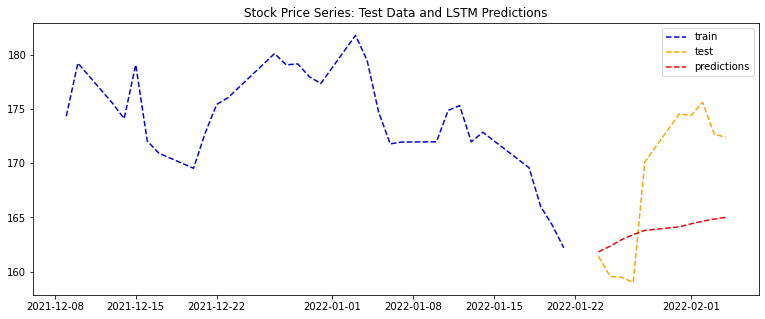

In [45]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[ 30], cells = [30],epochs=[2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

In [ ]:
result['model'].summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


{'model': <keras.engine.sequential.Sequential object at 0x7f60cea4a290>, 'mape': 0.03705216407378258, 'cell_units': 30, 'input': 30, 'epochs': 2000, 'predicted': array([[172.74548],
       [172.5244 ],
       [172.31882],
       [172.18945],
       [172.20358],
       [172.29213],
       [172.32317],
       [172.15729],
       [171.79723],
       [171.2156 ]], dtype=float32)}


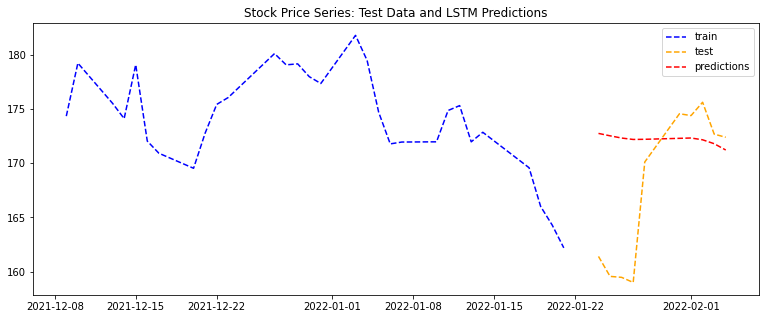

In [46]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs=[2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f60ce12fa50>, 'mape': 0.029263570956087833, 'cell_units': 30, 'input': 30, 'epochs': 3000, 'predicted': array([[165.48096],
       [169.06708],
       [171.7809 ],
       [172.44499],
       [172.5391 ],
       [172.54636],
       [172.53554],
       [172.49265],
       [172.39598],
       [172.2251 ]], dtype=float32)}


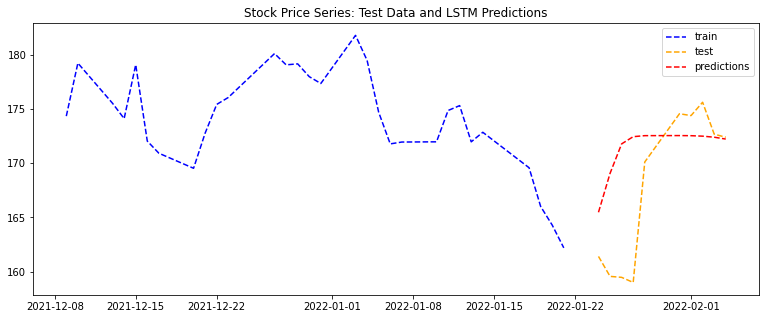

In [47]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs=[3000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f60cb05e990>, 'mape': 0.11519691236085366, 'cell_units': 70, 'input': 30, 'epochs': 3000, 'predicted': array([[162.73907],
       [159.55536],
       [153.82132],
       [149.70184],
       [146.87201],
       [145.00482],
       [143.72884],
       [142.83865],
       [142.2576 ],
       [141.92685]], dtype=float32)}


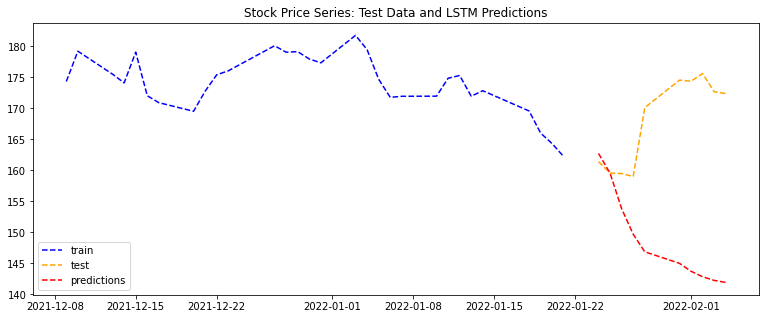

In [48]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [70],epochs=[3000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f60cbc48290>, 'mape': 0.10988561415938132, 'cell_units': 10, 'input': 10, 'epochs': 2000, 'predicted': array([[160.00052],
       [158.2153 ],
       [156.64331],
       [154.76865],
       [152.40536],
       [149.54172],
       [146.23254],
       [142.6296 ],
       [138.93512],
       [135.34372]], dtype=float32)}


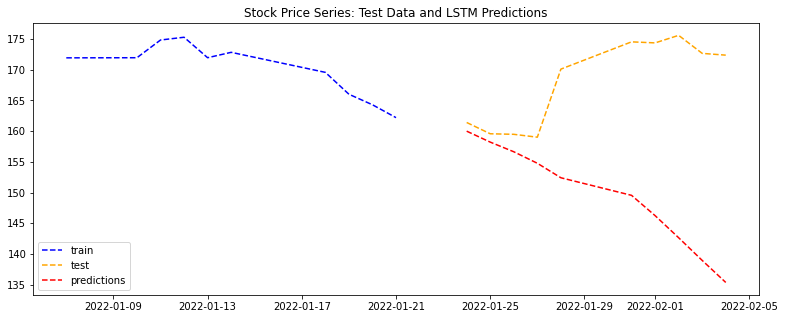

In [44]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[10], cells = [10],epochs=[2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f60cbcb0210>, 'mape': 0.044734542494983494, 'cell_units': 30, 'input': 20, 'epochs': 2000, 'predicted': array([[175.37804],
       [175.40135],
       [175.3972 ],
       [175.39227],
       [175.38045],
       [175.37575],
       [175.38445],
       [175.39691],
       [175.40506],
       [175.41005]], dtype=float32)}


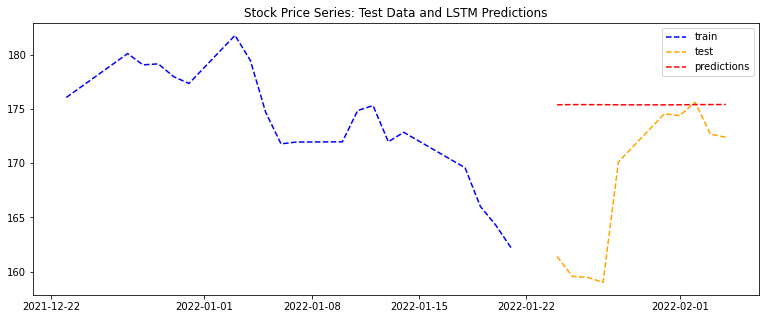

In [43]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[20], cells = [30],epochs=[2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f06f561af90>, 'mape': 0.034959637324925665, 'cell_units': 40, 'input': 30, 'epochs': 2000, 'predicted': array([[169.04498],
       [169.88803],
       [170.07776],
       [170.10974],
       [170.11148],
       [170.11008],
       [170.10904],
       [170.11032],
       [170.11179],
       [170.11188]], dtype=float32)}


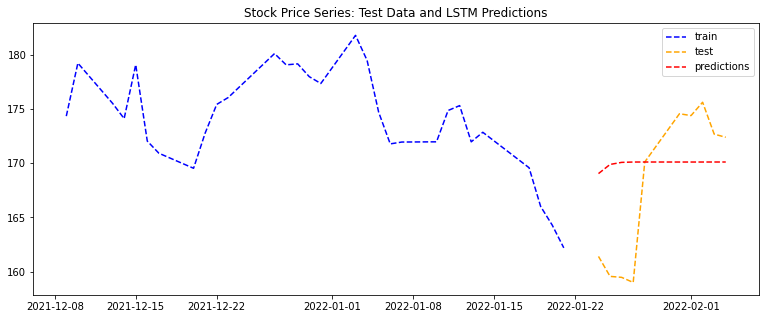

In [27]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [40],epochs=[2000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f06f561a490>, 'mape': 0.03421636161752525, 'cell_units': 70, 'input': 30, 'epochs': 3000, 'predicted': array([[169.93199],
       [172.10527],
       [172.1949 ],
       [172.22632],
       [172.23369],
       [172.27042],
       [172.27565],
       [172.27095],
       [172.22382],
       [172.21701]], dtype=float32)}


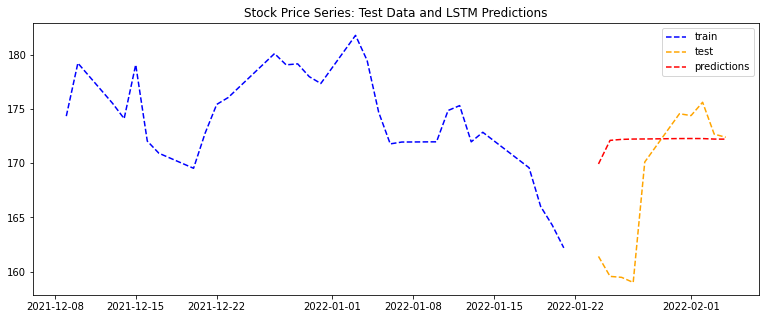

In [28]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [70],epochs=[3000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f06f4f43d50>, 'mape': 0.1809898428255112, 'cell_units': 30, 'input': 30, 'epochs': 3000, 'predicted': array([[147.00252],
       [140.12094],
       [135.9854 ],
       [136.1299 ],
       [136.52283],
       [136.26216],
       [135.94673],
       [135.82143],
       [135.77861],
       [135.74425]], dtype=float32)}


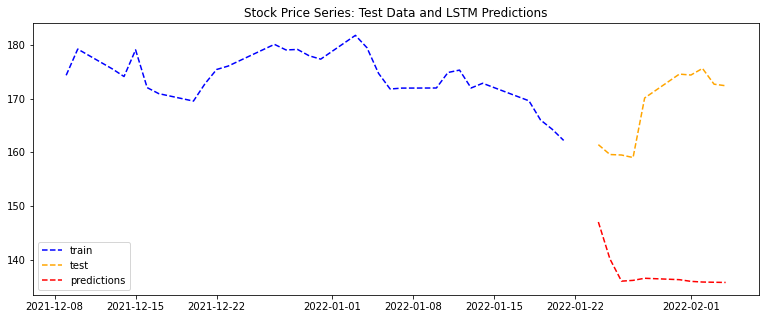

In [29]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [30],epochs=[3000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")

{'model': <keras.engine.sequential.Sequential object at 0x7f06f2c27d10>, 'mape': 0.03644644316794978, 'cell_units': 100, 'input': 30, 'epochs': 3000, 'predicted': array([[170.83253],
       [171.91539],
       [171.2078 ],
       [171.32176],
       [171.20932],
       [171.15857],
       [171.08197],
       [171.03555],
       [171.01788],
       [171.01366]], dtype=float32)}


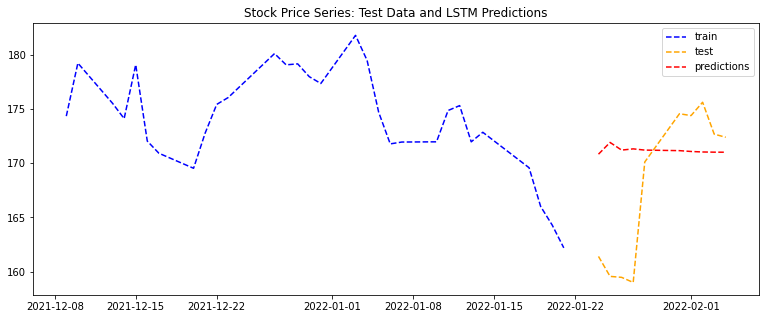

In [30]:
result=grid_search_LSTM(apple_daily,test_sz=10, input_hours=[30], cells = [100],epochs=[3000])
print(result)
plot_RNN_LSTM_validation(apple_daily,'Close', result['predicted'],input_hour=result['input'],test_sz=10,\
                    title="Stock Price Series: Test Data and LSTM Predictions")